# Superstore Marketing Campaign Dataset : Customer data for analysis of a targeted Membership Offer

## Business Context

Sebuah superstore ingin melaksanakan diskon akhir tahun. Untuk mendorong minat pembeli, mereka melakukan campaign dengan menawarkan gold membership yang memberikan diskon 20% untuk semua pembelian dengan harga 499 USD, dan akan naik menjadi 999 USD di lain hari khusus untuk existing customers lewat telepon. Pihak manajemen merasa cara terbaik untuk mengurangi biaya campaign adalah dengan cara membuat model yang dapat memprediksi customer yang diklasifikasikan akan membeli membership tersebut.

## Objective

- Memberikan prediksi terhadap variabel response yang membeli membership
- Merekomendasikan target customer yang seperti apa yang harus di hubungi untuk campaign selanjutnya






Data Source : https://www.kaggle.com/datasets/ahsan81/superstore-marketing-campaign-dataset/code

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Input Variables

This data was gathered during last year's campaign.

Data description is as follows;

1. ID - Unique ID of each customer
2. Year_Birth - Age of the customer
3. Education - customer's level of education
4. Marital - customer's marital status
5. Income - customer's yearly household income
6. Kidhome - number of small children in customer's household
7. Teenhome - number of teenagers in customer's household
8. Dt_Customer - date of customer's enrollment with the company
9. Recency - number of days since the last purchase
10. MntWines - the amount spent on wine products in the last 2 years
11. MntFruits - the amount spent on fruits products in the last 2 years
12. MntMeatProducts - the amount spent on meat products in the last 2 years
13. MntFishProducts - the amount spent on fish products in the last 2 years
14. MntSweetProducts - amount spent on sweet products in the last 2 years
15. MntGoldProds - the amount spent on gold products in the last 2 years
16. NumDealsPurchases - number of purchases made with discount
17. NumWebPurchases - number of purchases made through the company's website
18. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
19. NumStorePurchases - number of purchases made directly in stores
20. NumWebVisitsMonth - number of visits to company's website in the last month
21. Complain - 1 if the customer complained in the last 2 years,0 otherwise


**Target Variable :**

22. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise












# Load and Describe Data

## Load Dataset

In [2]:
df = pd.read_csv('superstore_data.csv')

In [3]:
#make a copy of dataframe
newdf = df.copy()

In [4]:
newdf

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0


## Data Description

In [5]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Observations:
- Data diatas mempunyai baris sebanyak 2240 dan kolom sebanyak 22
- Terdapat Missing Values pada kolom Income sebanyak 24 baris
- Kolom Dt_Customer akan di drop dan sebagai gantinya akan di extract ke kolom (Tahun,Bulan dan Tanggal)

## Check Null and Missing Values

In [6]:
data_missing_value = newdf.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(newdf))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,Income,24,1.07


Terdapat missing value di kolom Income sebanyak 24 kolom atau sebesar 1.07 %, karena jumlahnya sedikit maka akan di drop.

In [7]:
#drop missing values 
newdf = newdf.dropna().reset_index(drop=True)

In [8]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

Data sudah bersih dari missing values

## Duplicated Values

In [9]:
df.duplicated().sum()

0

Tidak ada data yang duplikat

## Check Unique Values

In [10]:
#make a group column names based on types
categoricals = newdf.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
numericals = newdf.select_dtypes(include=['int64', 'float64']).columns.tolist()

## Boxplot to detect outliers

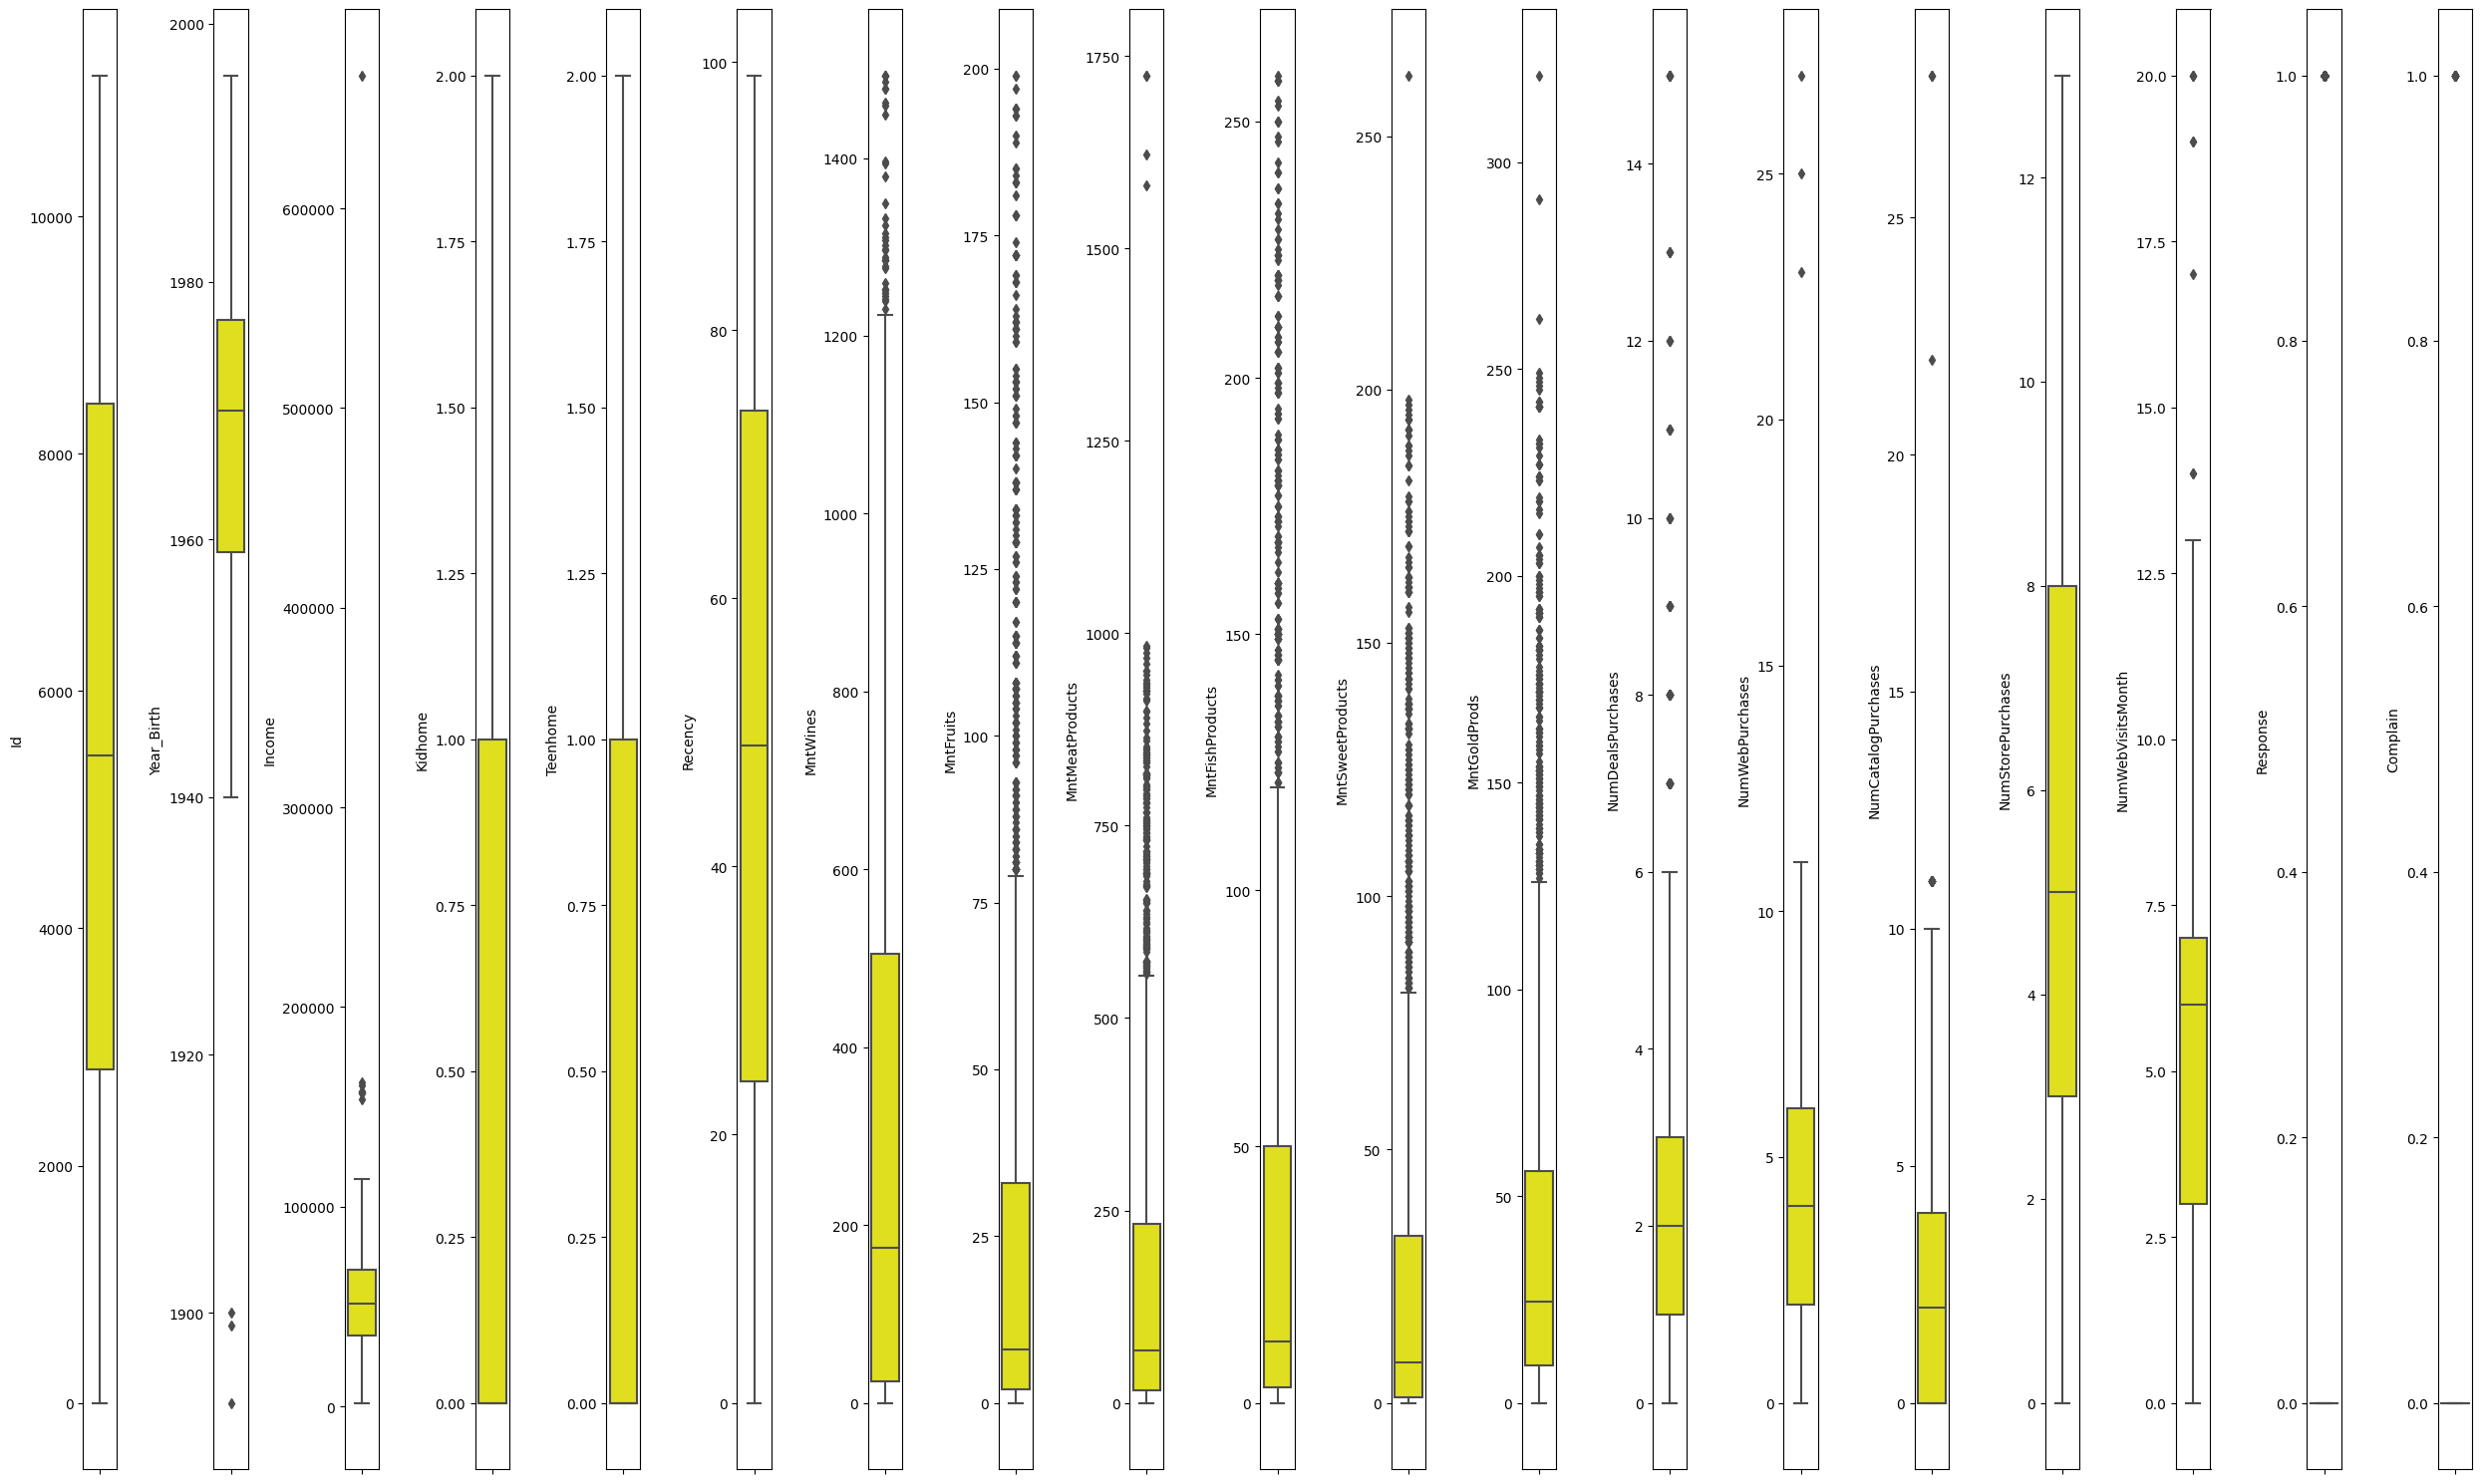

In [11]:
# adjust the figure size for better readability
plt.figure(figsize=(25,15))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=newdf[features[i]], color='yellow')
    plt.tight_layout()

Observations :

Terdapat beberapa outlier pada Variable :
- Year Birth
- Income
- MntWines
- MntFruits
- MntMeatProducts
- MntFishProducts
- MntSweetProducts
- MntGoldProds
- NumDealsPurchases
- NumWebPurchases
- NumCatalogPurchases
- NumWebVisitsMonth
- Response
- Complain

Pada kolom YearBirth terdapat nilai minimal yang dianggap tidak masuk akal dan pada kolom Income dengan nilai maksimal yang terlalu tinggi. Nilai tersebut nantinya akan di drop.sementara nilai sisanya pada masing-masing kolom dianggap masih masuk akal/tidak ada yang janggal


In [12]:
#Showing precise value counts in categoricals group
for col in categoricals:
  print(f'Value counts of {col} colums')
  print(newdf[col].value_counts(), '\n')

Value counts of Education colums
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64 

Value counts of Marital_Status colums
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64 

Value counts of Dt_Customer colums
8/31/2012    12
2/14/2013    11
12/5/2014    11
12/9/2012    11
8/20/2013    10
             ..
9/1/2014      1
5/9/2012      1
9/11/2013     1
7/20/2013     1
1/9/2012      1
Name: Dt_Customer, Length: 662, dtype: int64 



Observations:
- Terdapat value di kolom *Education* (2n Cycle) & *Marital_Status* (YOLO, Alone, Absurd & Together) yang akan diubah namanya agar lebih mudah untuk dipahami
- Kolom Dt_Customer juga akan di extract menjadi format Tahun,Bulan,Tanggal

In [13]:
#Showing precise value counts in numericals group
for col in numericals:
  print(f'Value counts of {col} colums')
  print(newdf[col].value_counts(), '\n')

Value counts of Id colums
1826    1
2525    1
3536    1
8686    1
9707    1
       ..
2379    1
2882    1
5710    1
933     1
4070    1
Name: Id, Length: 2216, dtype: int64 

Value counts of Year_Birth colums
1976    89
1971    86
1975    83
1972    78
1978    76
1970    75
1965    74
1973    72
1969    70
1974    69
1956    55
1979    53
1952    52
1977    52
1958    52
1968    51
1959    50
1966    50
1960    49
1954    49
1955    48
1982    44
1967    44
1963    44
1962    44
1951    42
1986    41
1983    41
1957    41
1964    41
1980    39
1984    38
1981    38
1961    35
1953    35
1985    32
1949    30
1989    29
1950    29
1988    29
1987    27
1948    21
1990    18
1947    16
1946    16
1991    15
1992    13
1945     8
1944     7
1943     6
1993     5
1995     5
1994     3
1996     2
1893     1
1899     1
1941     1
1940     1
1900     1
Name: Year_Birth, dtype: int64 

Value counts of Income colums
7500.0     12
35860.0     4
46098.0     3
39922.0     3
67445.0     3
         

Observations:
- Kolom Id akan di drop karena memiliki unique value yang terlalu banyak sehingga kita tidak bisa mencari pola untuk diprediksi
- Kolom Year_Birth akan di drop dan menggantinya ke dalam kolom Age agar lebih mudah dianalisa
- Dapat dilihat bahwa customer yang membeli membership pada campaign tahun lalu hanya sekitar (333 Cust) atau sekitar 15.02%
- Selama 2 tahun terakhir, rate complain bisa dibilang rendah hanya sebanyak (21 orang) atau sekitar 0.9% 

# Data Understanding

## Statistical Summary

In [14]:
#checking numerical statistical summary
newdf[numericals].describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.150271,0.009477
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.357417,0.096907
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


Observations :
- Pada kolom *Year Birth*, terdapat tahun lahir customer tahun 1893 yang merupakan suatu kejanggalan. karena sudah tidak     ada lagi manusia yang berusia 130 tahun. Sementara rata-rata dan maksimal tahun lahir dari customer ada pada tahun 1968 &   1996.
- Rata-rata *income* customer adalah 52.247 dollar. Income maksimal adalah 666.666 dollar dan minimal adalah 1730 dollar.
- Maksimal jumlah anak kecil yang dimiliki customer adalah 2 dan minimalnya adalah 0 (tidak punya anak kecil)
- Maksimal jumlah anak remaja yang dimiliki customer adalah 2 dan minimalnya adalah 0 (tidak punya anak remaja)
- Nilai maksimal dari tanggal pembelian terakhir adalah 99 hari, dan nilai minimalnya adalah 0 hari (artinya terdapat         transaksi dari existing customer di hari ini)
- Maksimal customer membeli produk *Wines* dengan menghabiskan uang  sebesar 1493 dollar ,rata-rata sebesar 305 dollar, dan   minimalnya adalah 0 (tidak membeli produk sama sekali)
- Maksimal customer membeli produk *Fruits* dengan menghabiskan uang sebesar 199 dollar , rata-rata sebesar 26.3 dollar,     dan minimalnya adalah 0 (tidak membeli produk sama sekali)
- Maksimal customer membeli Produk *Meat* dengan menghabiskan uang sebesar 1725 dollar , rata-rata sebesar 166 dollar, dan   minimalnya adalah 0 (tidak membeli produk sama sekali)
- Maksimal customer membeli Produk *Fish* dengan menghabiskan uang sebesar 259 dollar , rata-rata sebesar 37.6 dollar, dan   minimalnya adalah 0 (tidak membeli produk sama sekali)
- Maksimal customer membeli Produk *Sweet* dengan menghabiskan uang sebesar 262 dollar , rata-rata sebesar 27.2 dollar, dan   minimalnya adalah 0 (tidak membeli produk sama sekali)
- Maksimal customer membeli Produk *Gold* dengan menghabiskan uang sebesar 321 dollar , rata-rata sebesar 43.9 dollar, dan   minimalnya adalah 0 (tidak membeli produk sama sekali)
- Jumlah pembelian yang dilakukan dengan menggunakan diskon (*NumDealsPurchases*) maksimal sebanyak 15 , rata-rata sebanyak   2.3 dan minimal sebanyak 0 (tidak menggunakan diskon)
- Jumlah pembelian yang dilakukan lewat web perusahaan (*NumWebPurchases*) maksimal sebanyak 27 , rata-rata sebanyak 4.08     dan minimal sebanyak 0 (tidak membeli lewat web)
- Jumlah pembelian yang dilakukan lewat Katalog (*NumCatalogPurchases*) maksimal sebanyak 28 , rata-rata sebanyak 2.67       dan minimal sebanyak 0 (tidak membeli lewat katalog)
- Jumlah pembelian yang dilakukan langsung dari toko (*NumStorePurchases*) maksimal sebanyak 13 , rata-rata sebanyak 5.80     dan minimal sebanyak 0 (tidak membeli langsung dari toko)
- Jumlah pengunjung website perusahaan pada bulan lalu maksimal sebanyak (*NumWebVisitsMonth*) 20 orang, rata- rata           sebanyak 5.31 dan minimal sebanyak 0 (tidak mengunjungi website sama sekali)
- Response 1 (membeli membership) dan 0 sebaliknya
- Complain 1 (Melakukan Komplain) dan 0 sebaliknya


In [15]:
#checking categoricals statistical summary
newdf[categoricals].describe().T

,count,unique,top,freq
Education,2216,5,Graduation,1116
Marital_Status,2216,8,Married,857
Dt_Customer,2216,662,8/31/2012,12


Observations :
- Sebagian besar customer superstore merupakan seorang Bachelor's Degree/S1 (1116/2216)
- Sebagian besar customer superstore sudah menikah (857/2216)
- Sebanyak 12 orang membeli membership di superstore pada tanggal 31-08-2012

## Univariate Analysis

## KDE plot for knowing the distribution form

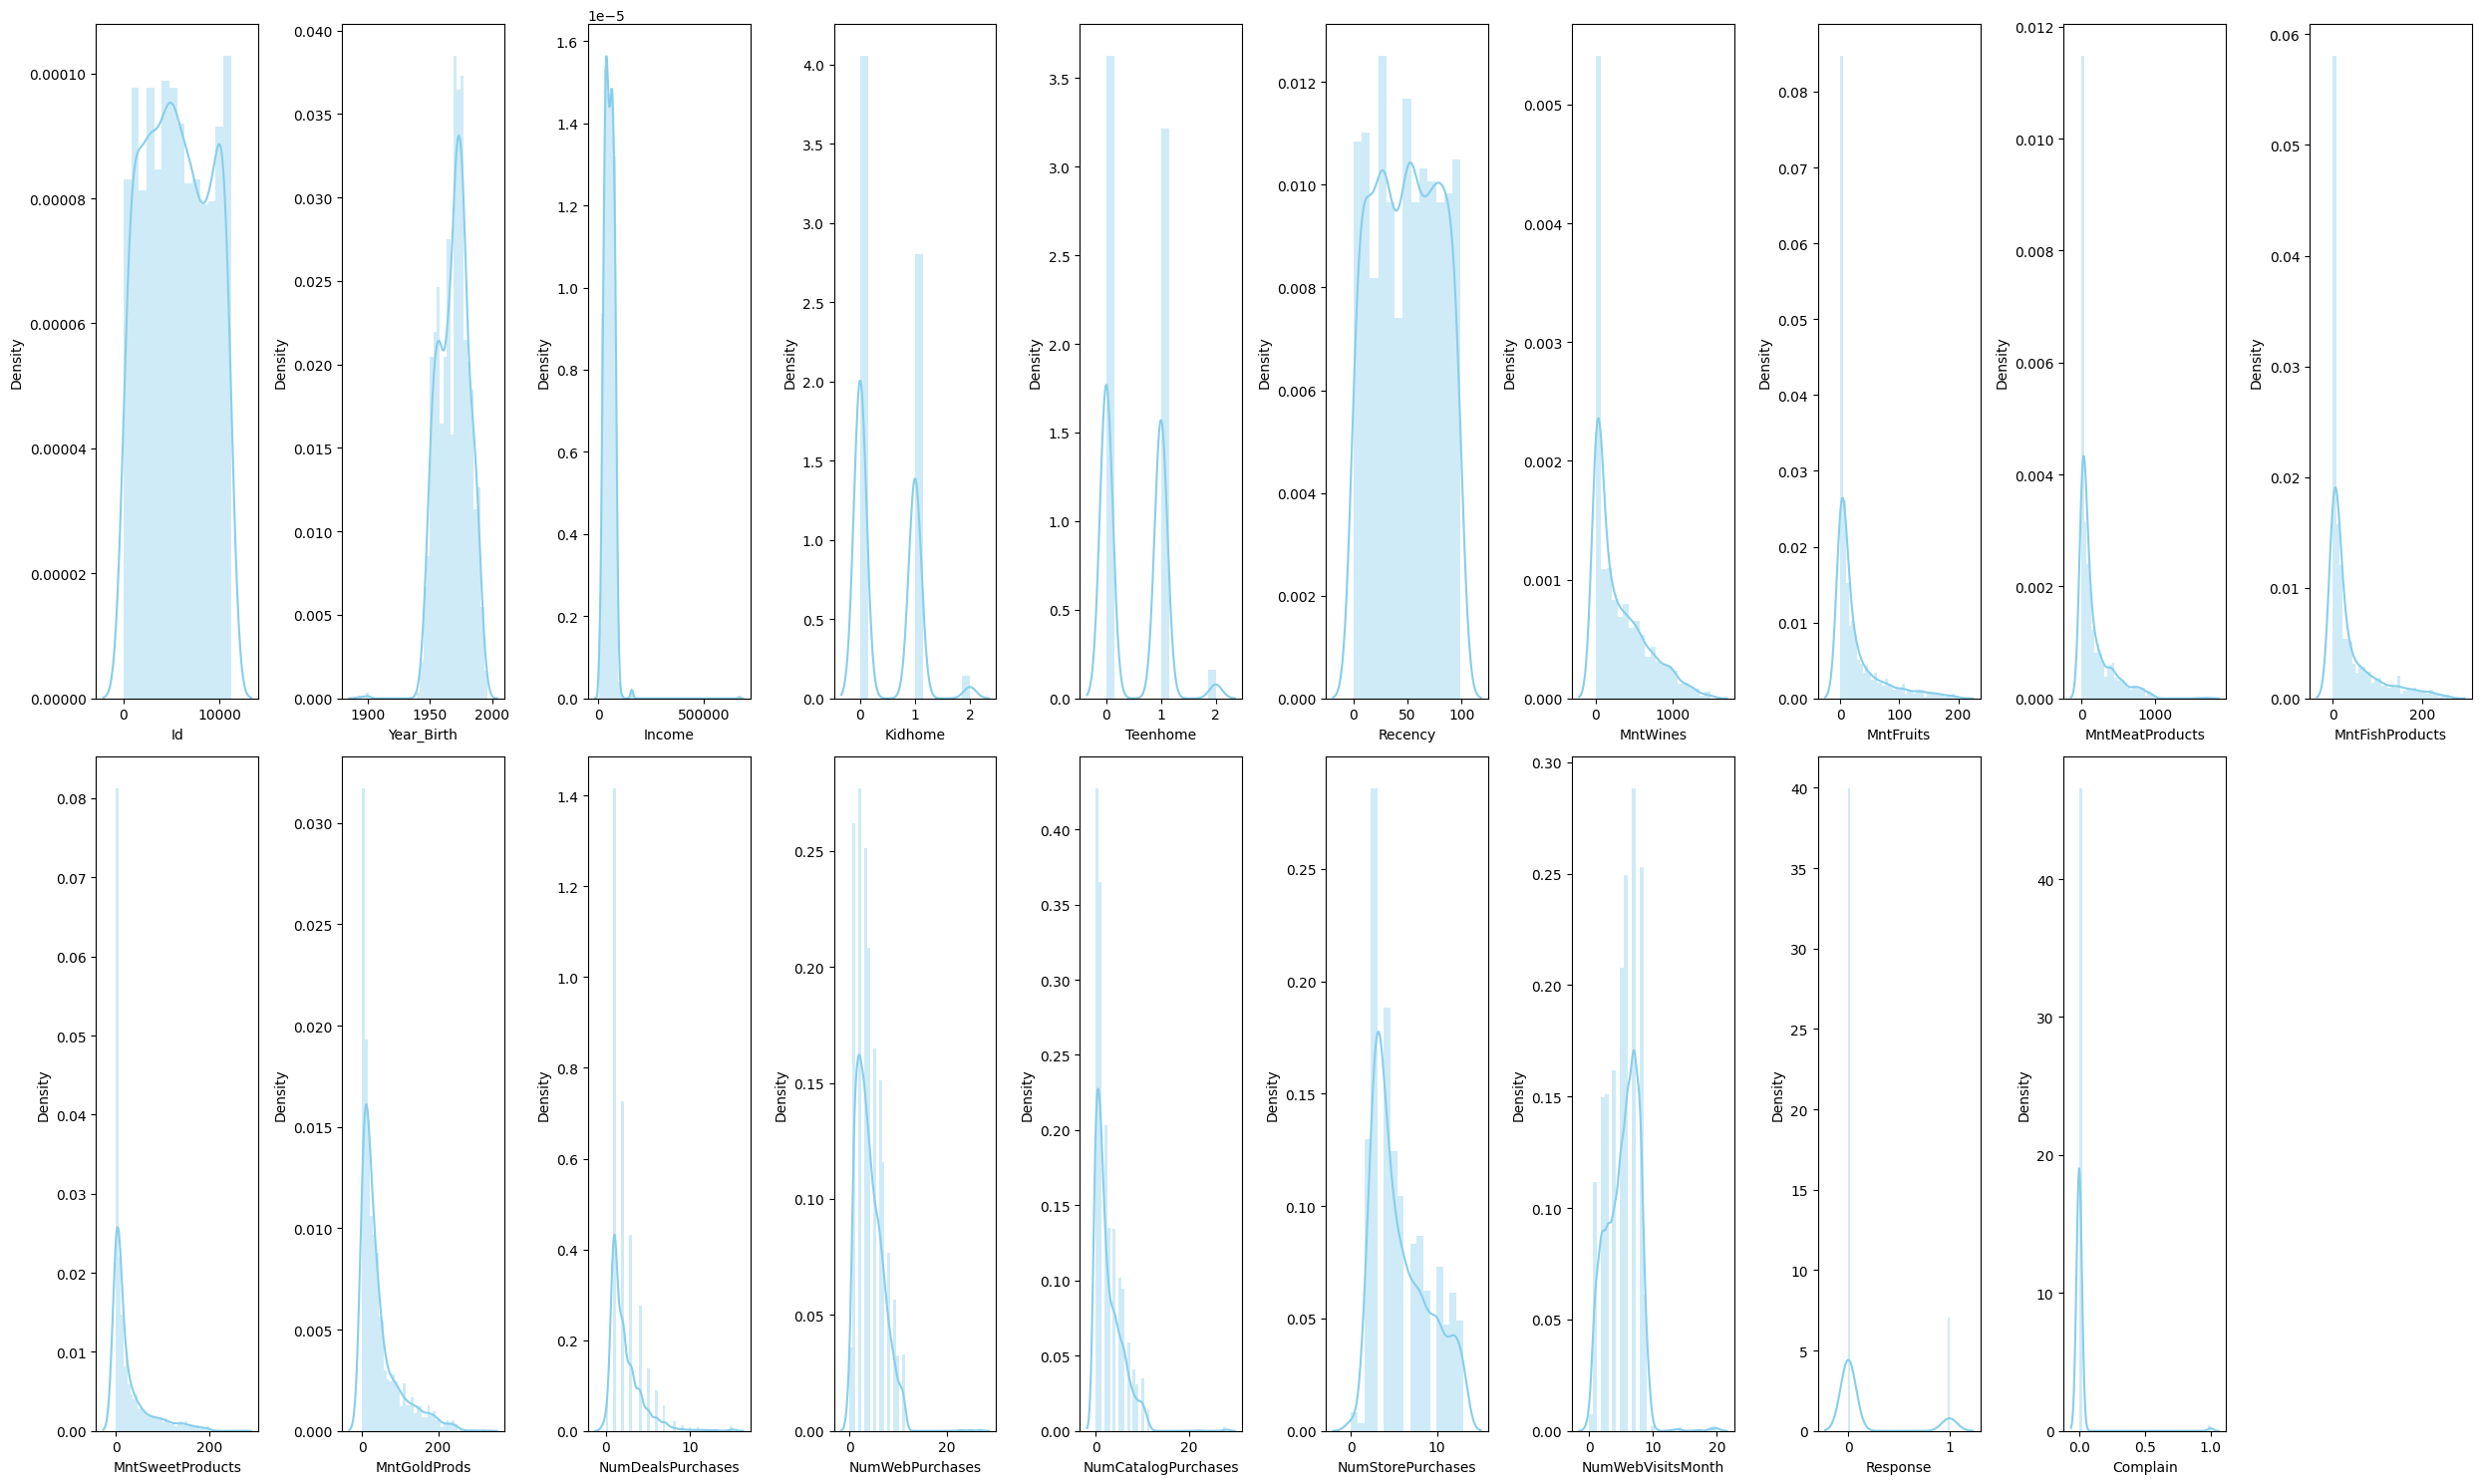

In [16]:
# adjust the figure size for better readability
plt.figure(figsize=(25,15))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=newdf[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

   Distribusi Data :
 - Kolom Year Birth memiliki persebaran data bersifat negative skewed
 - Kolom Income memiliki persebaran data bersifat positive skewed
 - Kolom Kidhome memiliki persebaran data bersifat positive skewed
 - Kolom Teenhome memiliki persebaran data bersifat positive skewed
 - Kolom Recency memiliki persebaran data bersifat simetris/ normal distribution
 - Kolom MntWines memiliki persebaran data bersifat positive skewed
 - Kolom MntFruits memiliki persebaran data bersifat positive skewed
 - Kolom MntMeatProducts memiliki persebaran data bersifat positive skewed
 - Kolom MntFishProducts memiliki persebaran data bersifat positive skewed
 - Kolom MntSweetProducts memiliki persebaran data bersifat positive skewed
 - Kolom MntGoldProds memiliki persebaran data bersifat positive skewed
 - Kolom NumDealsPurchases memiliki persebaran data bersifat positive skewed
 - Kolom NumWebPurchases memiliki persebaran data bersifat positive skewed
 - Kolom NumCatalogPurchases memiliki persebaran data bersifat positive skewed
 - Kolom NumStorePurchases memiliki persebaran data bersifat positive skewed
 - Kolom NumWebVisitsMonth memiliki persebaran data bersifat simetris/ normal distribution
 - Kolom Response & Complaian bersifat Diskret, jadi kita abaikan jenis persebaran datanya

# Feature Engineering

In [17]:
#converting to date time object
newdf['Dt_Customer'] = pd.to_datetime(newdf['Dt_Customer'])

In [18]:
newdf['Dt_Customer'] = pd.to_datetime(newdf.Dt_Customer, format='%d-%m-%Y')

In [19]:
#extracting year,month,date
newdf['reg_year'] = newdf['Dt_Customer'].dt.year
newdf['reg_month'] = newdf['Dt_Customer'].dt.month
newdf['reg_day'] = newdf['Dt_Customer'].dt.day

In [20]:
#drop column Dt_Customer as it has been represented by Year,Month and day
newdf = newdf.drop("Dt_Customer", axis=1)

In [21]:
#mengubah nama value di kolom Marital Status
newdf["Marital_Status"] = newdf["Marital_Status"].replace(["YOLO", "Alone", "Absurd"], "Single")
newdf["Marital_Status"] = newdf["Marital_Status"].replace(["Together"], "Married")

In [22]:
#mengubah nama value di kolom Education
newdf["Education"] = newdf["Education"].replace("2n Cycle", "Master")

In [23]:
#drop id column
newdf = newdf.drop("Id", axis=1)

In [24]:
#membuat kolom baru 'age' agar memudahkan menganalisa menggunakan umur customer
newdf["Age"] = 2023 - pd.to_datetime(newdf["Year_Birth"], format="%Y").apply(lambda x: x.year)

In [25]:
#drop year birth column
newdf = newdf.drop('Year_Birth', axis=1)

In [26]:
#re-checking data
newdf

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,reg_year,reg_month,reg_day,Age
0,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,...,4,4,6,1,1,0,2014,6,16,53
1,Graduation,Single,57091.0,0,0,0,464,5,64,7,...,7,3,7,5,1,0,2014,6,15,62
2,Graduation,Married,67267.0,0,1,0,134,11,59,15,...,3,2,5,2,0,0,2014,5,13,65
3,Graduation,Married,32474.0,1,1,0,10,0,1,0,...,1,0,2,7,0,0,2014,11,5,56
4,Graduation,Single,21474.0,1,0,0,6,16,24,11,...,3,1,2,7,1,0,2014,8,4,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,PhD,Divorced,66476.0,0,1,99,372,18,126,47,...,5,2,11,4,0,0,2013,7,3,47
2212,Master,Married,31056.0,1,0,99,5,10,13,3,...,1,0,3,8,0,0,2013,1,22,46
2213,Graduation,Divorced,46310.0,1,0,99,185,2,88,15,...,6,1,5,8,0,0,2012,3,12,47
2214,Graduation,Married,65819.0,0,0,99,267,38,701,149,...,5,4,10,3,0,0,2012,11,29,45


Data sudah bersih dari missing values dan duplikat,serta sudah ditambahkan beberapa kolom baru sehingga data sudah dapat digunakan untuk memudahkan proses analisa

# Explolatory Data Analysis (EDA)

In [27]:
#melihat distribusi data pada target variable
perc=newdf['Response'].value_counts(normalize=True)*100
perc

0    84.972924
1    15.027076
Name: Response, dtype: float64

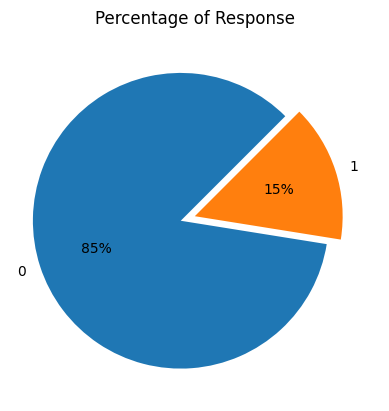

In [28]:
#memvisualisasikan distribusi target variabel
plt.pie(perc.values, labels=perc.index, startangle=45, autopct='%1.0f%%',explode=(0.1,0) )

plt.title("Percentage of Response")
plt.show()

## 1. Bagaimana Insight dari variabel Profil Customer terhadap Response?

### Education & Response

In [29]:
#Drop Age customer diatas 100 Tahun
newdf = newdf.drop(newdf[newdf['Age'] >= 100].index)

In [30]:
edu = pd.concat([newdf], axis= 1).groupby(['Education']).agg(
    Resp =('Response', 'sum'),
    Customer=('Response', 'count')
).reset_index()
edu['Resp %'] = edu['Resp']/edu['Customer']*100
edu = edu.sort_values('Resp %', ascending=False)
edu


,Education,Resp,Customer,Resp %
3,PhD,101,480,21.041667
2,Master,78,563,13.854352
1,Graduation,152,1116,13.620072
0,Basic,2,54,3.703704


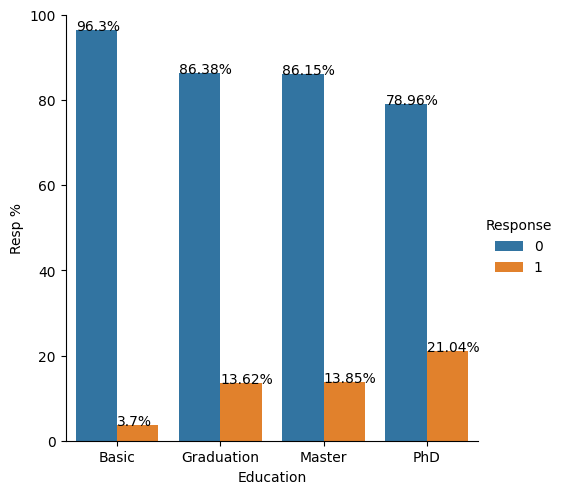

In [31]:
newdf1 = newdf.copy()

x,y = 'Education', 'Response'

newdf1 = newdf1.groupby(x)[y].value_counts(normalize=True)
newdf1 = newdf1.mul(100)
newdf1 = newdf1.rename('Resp %').reset_index()

g = sns.catplot(x=x,y='Resp %',hue=y,kind='bar',data=newdf1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

Observations :
- Customer latar belakang pendidikan PhD merupakan customer yang paling banyak membeli membership dengan total pembelian     101 dari 480 orang (21.04%), diikuti dengan customer (Master) dengan total pembelian 78 dari 563 orang (13.85%), lalu       Customer (Graduation) dengan total pembelian 152 dari 1116 orang (13.62%) dan terakhir customer (Basic) dengan total       pembelian 2dari 54 orang (3.7%)

Dari data diatas dapat diperoleh insight bahwa semakin tinggi Education customer, semakin banyak pula yang membeli membership di superstore. Dan sebaliknya, semakin rendah tingkat pendidikan,semakin sedikit yang membeli membership.

### Marital_Status & Response

In [32]:
Marit_st = pd.concat([newdf], axis= 1).groupby(['Marital_Status']).agg(
    Resp =('Response', 'sum'),
    customer=('Response', 'count')
).reset_index()
Marit_st['Resp %'] = Marit_st['Resp']/Marit_st['customer']*100
Marit_st = Marit_st.sort_values('Resp %', ascending=False)
Marit_st

,Marital_Status,Resp,customer,Resp %
3,Widow,18,76,23.684211
2,Single,109,477,22.851153
0,Divorced,48,231,20.779221
1,Married,158,1429,11.056683


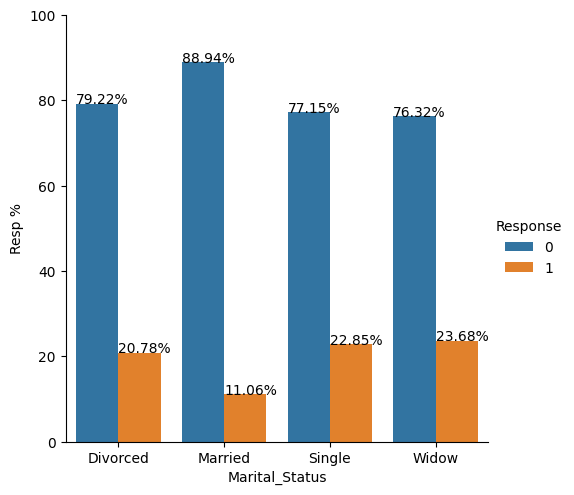

In [33]:
newdf1 = newdf.copy()
x,y = 'Marital_Status', 'Response'

newdf1 = newdf1.groupby(x)[y].value_counts(normalize=True)
newdf1 = newdf1.mul(100)
newdf1 = newdf1.rename('Resp %').reset_index()

g = sns.catplot(x=x,y='Resp %',hue=y,kind='bar',data=newdf1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

Observations :
- Customer dengan Marital Status (Widow) merupakan customer yang paling banyak melakukan pembelian membership dengan persentase sekitar 23.68 % (18/76 orang), diikuti customer dengan Marital Status (Single), (Divorced) dan terakhir  (Married) dengan persentase masing-masing sebesar 22,85% (109/477 orang), 20.78% (48/231 orang) dan 11.06% (158/1429).



### Kidhome & Response

In [34]:
Kid_hm = pd.concat([newdf], axis= 1).groupby(['Kidhome']).agg(
    Resp =('Response', 'sum'),
    customer=('Response', 'count')
).reset_index()
Kid_hm['Resp %'] = Kid_hm['Resp']/Kid_hm['customer']*100
Kid_hm = Kid_hm.sort_values('Resp %', ascending=False)
Kid_hm

,Kidhome,Resp,customer,Resp %
0,0,221,1281,17.252147
1,1,110,886,12.415350
2,2,2,46,4.347826


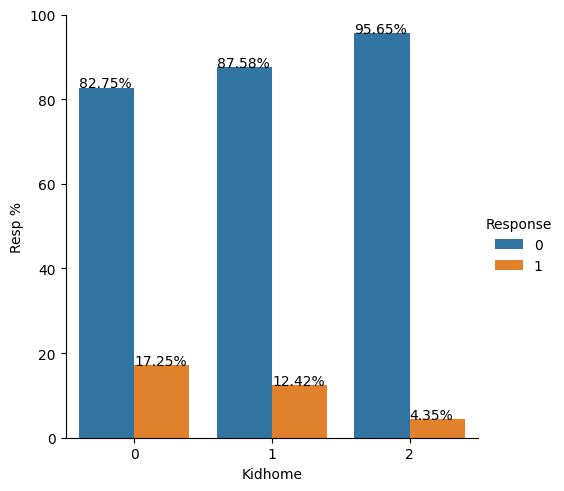

In [35]:
newdf1 = newdf.copy()
x,y = 'Kidhome', 'Response'

newdf1 = newdf1.groupby(x)[y].value_counts(normalize=True)
newdf1 = newdf1.mul(100)
newdf1 = newdf1.rename('Resp %').reset_index()

g = sns.catplot(x=x,y='Resp %',hue=y,kind='bar',data=newdf1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

Observations :
- Terdapat insight yang menarik bahwa jumlah customer yang tidak memiliki Kidhome (0) malah membeli membership lebih banyak (17.25%) dibandingkan customer yang memiliki 1 (12.42%) atau 2 (4.35%) Kidhome.

### Teenhome & Response

In [36]:
Teen_hm = pd.concat([newdf], axis= 1).groupby(['Teenhome']).agg(
    Resp =('Response', 'sum'),
    customer=('Response', 'count')
).reset_index()
Teen_hm['Resp %'] = Teen_hm['Resp']/Teen_hm['customer']*100
Teen_hm = Teen_hm.sort_values('Resp %', ascending=False)
Teen_hm

,Teenhome,Resp,customer,Resp %
0,0,236,1145,20.611354
2,2,5,51,9.803922
1,1,92,1017,9.046214


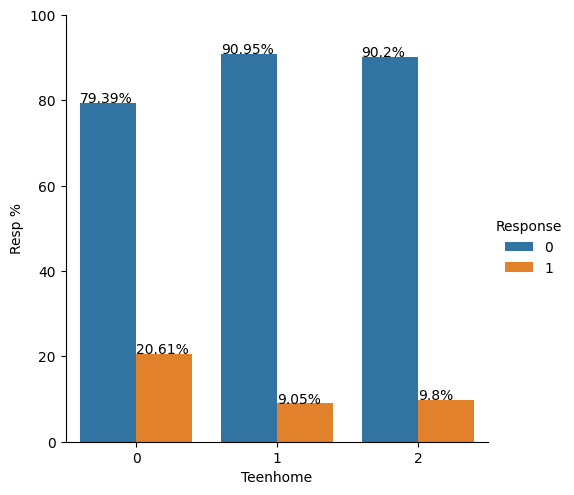

In [37]:
newdf1 = newdf.copy()
x,y = 'Teenhome', 'Response'

newdf1 = newdf1.groupby(x)[y].value_counts(normalize=True)
newdf1 = newdf1.mul(100)
newdf1 = newdf1.rename('Resp %').reset_index()

g = sns.catplot(x=x,y='Resp %',hue=y,kind='bar',data=newdf1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

Observations :
- Uniknya customer yang tidak memiliki anak remaja di rumahnya yang cenderung membeli membership, padahal semakin banyak orang di rumah tingkat konsumsi akan semakin tinggi yang berkorelasi juga dengan peningkatan pembelian membership.
- Jumlah customer yang tidak memiliki Teenhome (0) membeli membership lebih banyak (20.61%) dibandingkan customer yang memiliki 1 (9.05%) atau 2 (9.80%) Teenhome. Dengan demikian sudah memunculkan 2 hipotesis bahwa produk yang dijual tidak ramah atau cocok untuk anak kecil maupun anak remaja.

### Age & Response 

In [38]:
#Pengelompokan umur 
def age_1 (x) :
    if x<=30 :
        return '20-30'
    elif x<=40 :
        return '31-40'
    elif x<=50 :
        return '41-50'
    elif x<=60 :
        return '51-60'  
    elif x<=70 :
        return '61-70'
    else :
        return '71+'

In [39]:
#dilakukan penambahan kolom baru untuk feature age yang telah di modifikasi untuk memudahkan analisa
newdf['age_cat'] = newdf['Age'].apply(age_1)

In [40]:
Age_Ct = pd.concat([newdf], axis= 1).groupby(['age_cat']).agg(
    Resp =('Response', 'sum'),
    customer=('Response', 'count')
).reset_index()
Age_Ct['Resp %'] = Age_Ct['Resp']/Age_Ct['customer']*100
Age_Ct = Age_Ct.sort_values('Resp %', ascending=False)
Age_Ct

,age_cat,Resp,customer,Resp %
0,20-30,5,15,33.333333
1,31-40,53,283,18.727915
5,71+,35,229,15.283843
3,51-60,90,613,14.681892
4,61-70,66,458,14.410480
2,41-50,84,615,13.658537


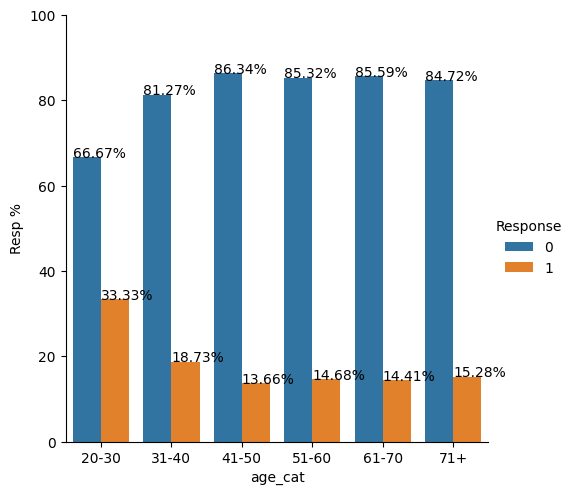

In [41]:
newdf1 = newdf.copy()
x,y = 'age_cat', 'Response'

newdf1 = newdf1.groupby(x)[y].value_counts(normalize=True)
newdf1 = newdf1.mul(100)
newdf1 = newdf1.rename('Resp %').reset_index()

g = sns.catplot(x=x,y='Resp %',hue=y,kind='bar',data=newdf1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

Observations :
- Jumlah customer dengan pembeli membership terbanyak ada di jarak umur antara 20 - 30 tahun (33.33%), diikuti oleh kategori umur 31- 40 tahun (18.73%), 71 + (15.28%), 51 - 60 tahun (14.68%), 61 - 70 tahun (14.41%) & 41 - 50 tahun (13.66%). 

### Recency & Response

In [42]:
#Pengelompokan Recency
def Rec_1 (x) :
    if x<=20 :
        return '0-20'
    elif x<=40 :
        return '21-40'
    elif x<=60 :
        return '41-60'
    elif x<=80 :
        return '61-80'  
    else :
        return '80+'

In [43]:
#dilakukan penambahan kolom baru untuk feature recency yang telah di modifikasi untuk memudahkan analisa
newdf['Recency_cat'] = newdf['Recency'].apply(Rec_1)

In [44]:
Rec_Ct = pd.concat([newdf], axis= 1).groupby(['Recency_cat']).agg(
    Resp =('Response', 'sum'),
    customer=('Response', 'count')
).reset_index()
Rec_Ct['Resp %'] = Rec_Ct['Resp']/Rec_Ct['customer']*100
Rec_Ct = Rec_Ct.sort_values('Resp %', ascending=False)
Rec_Ct

,Recency_cat,Resp,customer,Resp %
0,0-20,136,473,28.752643
1,21-40,74,449,16.481069
2,41-60,52,442,11.764706
3,61-80,45,439,10.250569
4,80+,26,410,6.341463


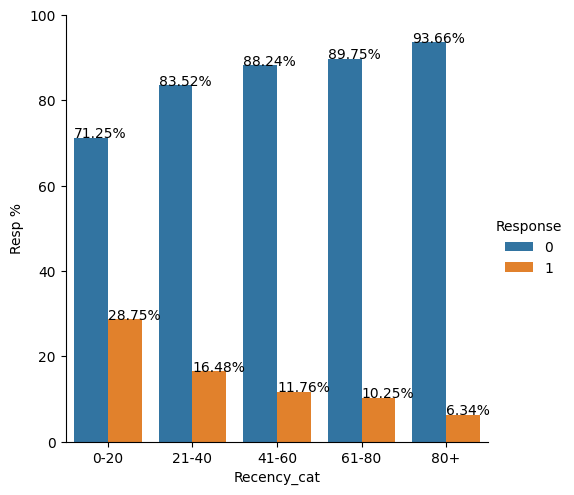

In [45]:
newdf1 = newdf.copy()
x,y = 'Recency_cat', 'Response'

newdf1 = newdf1.groupby(x)[y].value_counts(normalize=True)
newdf1 = newdf1.mul(100)
newdf1 = newdf1.rename('Resp %').reset_index()

g = sns.catplot(x=x,y='Resp %',hue=y,kind='bar',data=newdf1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

Observations :
- Berdasarkan insight diatas, customer dengan jangka waktu pembelian di range 0 - 20 hari dari tanggal pembelian sebelumnya melakukan pembelian membership paling banyak (28.75%). Artinya semakin lama jarak waktu suatu pembelian dengan tangggal pembelian terakhir,customer cenderung enggan membeli membership dan sebaliknya.

### Income & Response

In [46]:
#Drop Income customer diatas 600.000 USD
newdf = newdf.drop(newdf[newdf['Income'] >= 600000].index)

In [47]:
#Pengelompokan Income
def Inc_1 (x) :
    if x<=50000 :
        return '<= 50000'
    elif x<=100000 :
        return '<= 100000'
    elif x<=150000 :
        return '<= 150000'
    else :
        return '> 150000'

In [48]:
#dilakukan penambahan kolom baru untuk feature income yang telah di modifikasi untuk memudahkan analisa
newdf['Income_cat'] = newdf['Income'].apply(Inc_1)

In [49]:
Inc_Ct = pd.concat([newdf], axis= 1).groupby(['Income_cat']).agg(
    Resp =('Response', 'sum'),
    customer=('Response', 'count')
).reset_index()
Inc_Ct['Resp %'] = Inc_Ct['Resp']/Inc_Ct['customer']*100
Inc_Ct = Inc_Ct.sort_values('Resp %', ascending=False)
Inc_Ct

,Income_cat,Resp,customer,Resp %
1,<= 150000,4,5,80.000000
0,<= 100000,205,1141,17.966696
2,<= 50000,124,1059,11.709160
3,> 150000,0,7,0.000000


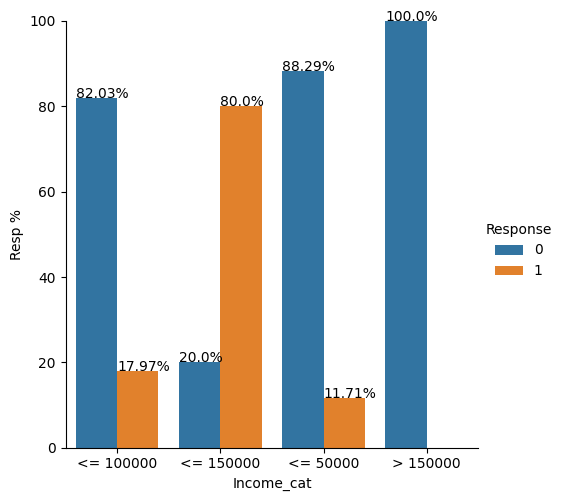

In [50]:
newdf1 = newdf.copy()
x,y = 'Income_cat', 'Response'

newdf1 = newdf1.groupby(x)[y].value_counts(normalize=True)
newdf1 = newdf1.mul(100)
newdf1 = newdf1.rename('Resp %').reset_index()

g = sns.catplot(x=x,y='Resp %',hue=y,kind='bar',data=newdf1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

Observations: 
- Secara persentase jumlah customer dengan kategori Income 100.000 - 150.000 melakukan pembelian membership sebanyak 80% (4/5 orang). Dengan demikian, istilah semakin banyak income customer semakin juga mendorong penjualan membership di superstore ini hanya berlaku pada range income di angka 0 - 150.000. karena terdapat customer dengan income > 150.000 namun dia tidak membeli membership sama sekali. 

# 2. Bagaimana pengaruh jenis produk  terhadap Response?

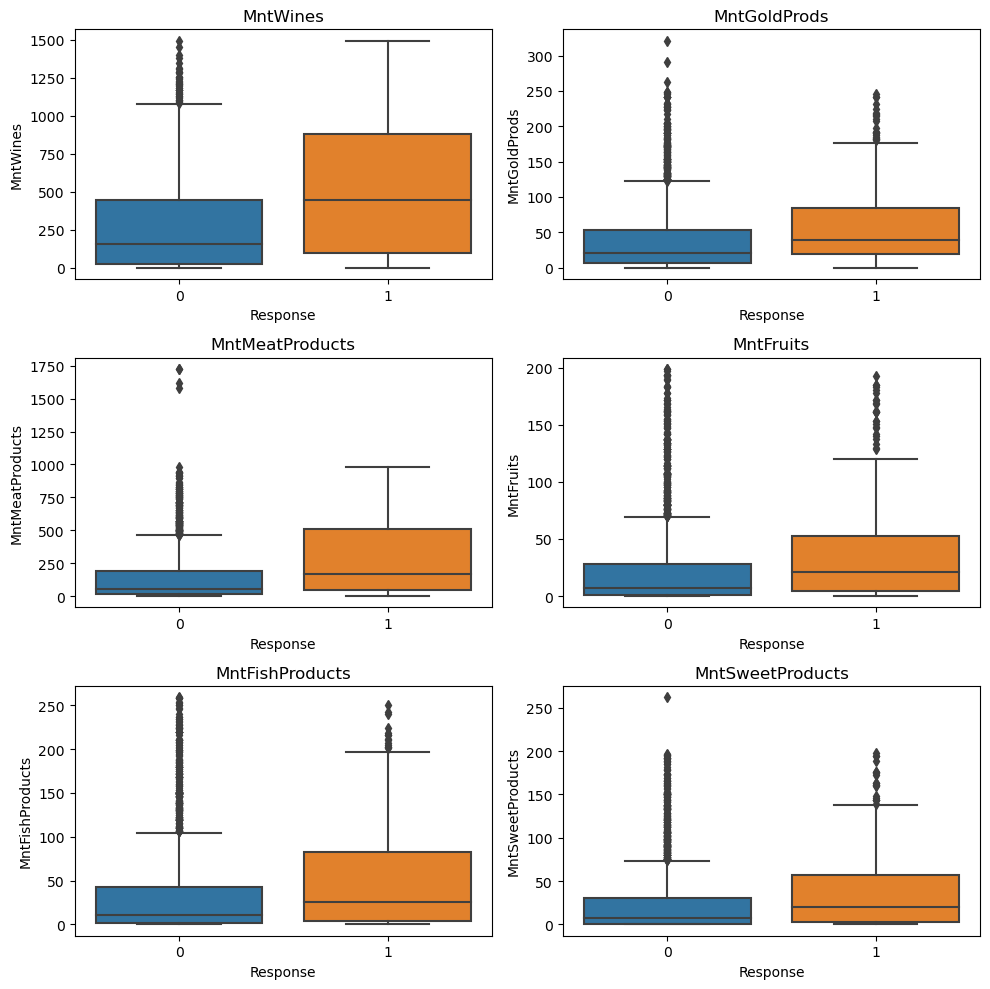

In [ ]:
Prods_resp = newdf[
    [
        "MntWines",
        "MntGoldProds",
        "MntMeatProducts",
        "MntFruits",
        "MntFishProducts",
        "MntSweetProducts",
    ]
].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(Prods_resp):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(newdf["Response"], newdf[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

Observation :
- Masing - masing boxplot diatas menunjukan bahwa customer yang menghabiskan lebih banyak uangnya pada produk-produk diatas cenderung akan mengambil/membeli membership. Artinya produk-produk superstore yang ada memiliki peranan yang sama dan berpengaruh pada penjualan membership.

# 3. Berapa banyak pembelian yang dilakukan lewat marketing channel yang tersedia di superstore, dan bagaimana pengaruhnya terhadap variable response?

In [51]:
# Menghitung banyaknya purchase pada masing-masing marketing channel
NumDealsPurchases_count = newdf['NumDealsPurchases'].sum()
NumWebPurchases_count = newdf['NumWebPurchases'].sum()
NumCatalogPurchases_count = newdf['NumCatalogPurchases'].sum()
NumStorePurchases_count = newdf['NumStorePurchases'].sum()

In [52]:
df_purchase = {'Market_channel':['Store', 'Website', 'Catalog', 'Discount'],
      'Total_Mrktchannel':[NumStorePurchases_count, NumWebPurchases_count, NumCatalogPurchases_count, NumDealsPurchases_count]}

df_purchase= pd.DataFrame(df_purchase)
df_purchase


,Market_channel,Total_Mrktchannel
0,Store,12844
1,Website,9043
2,Catalog,5911
3,Discount,5142


Text(0, 0.5, 'Purchase Count')

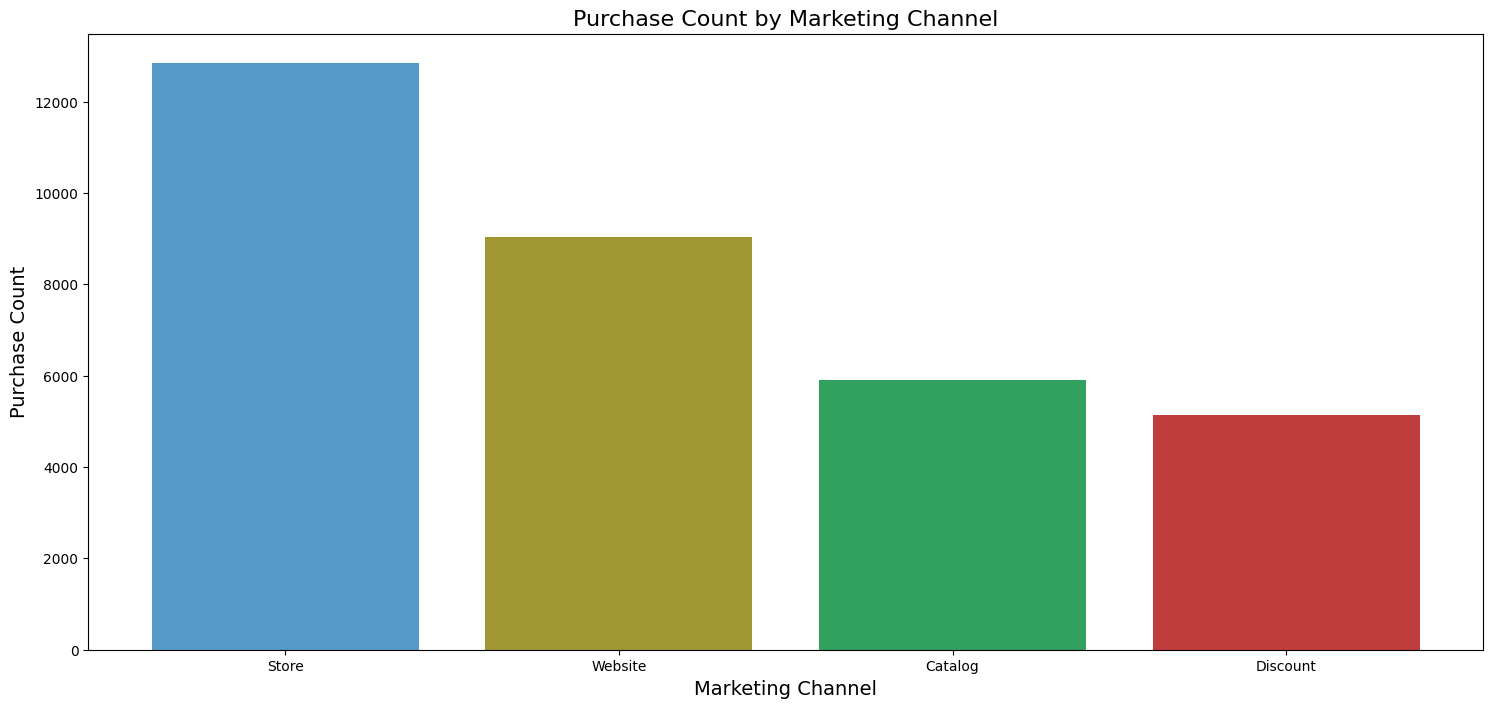

In [53]:
plt.figure(figsize=(18, 8))
colors = ['#559bca', '#a19732', '#32a15f', '#c03d3e']
plt.bar(df_purchase['Market_channel'], df_purchase['Total_Mrktchannel'], color=colors)
plt.title('Purchase Count by Marketing Channel', fontsize = 16)
plt.xlabel('Marketing Channel', fontsize = 14)
plt.ylabel('Purchase Count', fontsize = 14)

Observations :
- Marketing Channel yang menghasilkan pembelian terbanyak adalah Store dengan jumlah 12.847 pembelian, diikuti oleh Website,Catalog & Discount dengan masing-masing sebanyak 9046, 5912 & 5146 pembelian.

### NumDealsPurchases & Response

In [54]:
newdf['NumDealsPurchases'].unique()

array([ 1,  2,  3,  0,  4, 12,  7,  5,  6, 11,  9,  8, 10, 15, 13])

In [55]:
#Pengelompokan NumDealsPurchases
def Deals_1 (x) :
    if x<=3 :
        return '0-3'
    elif x<=6 :
        return '4-6'
    elif x<=9 :
        return '7-9'  
    else :
        return '10+'

In [56]:
#dilakukan penambahan kolom baru untuk feature NumDealsPurchases  yang telah di modifikasi untuk memudahkan analisa
newdf['NumDeals_freq'] = newdf['NumDealsPurchases'].apply(Deals_1)

In [57]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[0]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending= False
    )
    
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))  
    plt.show()

Response          0    1   All
NumDeals_freq                 
All            1879  333  2212
0-3            1526  261  1787
4-6             287   54   341
7-9              49   12    61
10+              17    6    23
------------------------------------------------------------------------------------------------------------------------


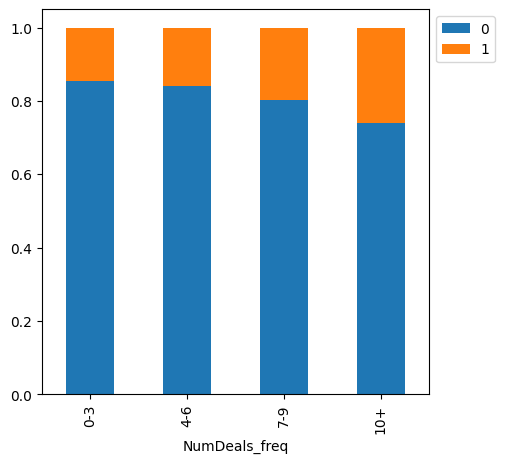

In [58]:
stacked_barplot(newdf, "NumDeals_freq", "Response")

Tabel diatas menunjukan bahwa semakin banyak pembelian yang dilakukan oleh customer dengan menggunakan diskon (NumDealsPurchases),semakin banyak pula customer yang membeli membership

### NumWebPurchases & Response

In [59]:
newdf['NumWebPurchases'].unique()

array([ 4,  7,  3,  1, 10,  2,  6,  5, 25,  8,  9,  0, 11, 27, 23])

In [60]:
#Pengelompokan NumWebPurchases
def Web_1 (x) :
    if x<=3 :
        return '0-3'
    elif x<=6 :
        return '4-6'
    elif x<=9 :
        return '7-9'  
    else :
        return '10+'

In [61]:
#dilakukan penambahan kolom baru untuk feature NumWebPurchases  yang telah di modifikasi untuk memudahkan analisa
newdf['NumWeb_freq'] = newdf['NumWebPurchases'].apply(Web_1)

Response        0    1   All
NumWeb_freq                 
All          1879  333  2212
0-3           989  106  1095
4-6           568  128   696
7-9           255   76   331
10+            67   23    90
------------------------------------------------------------------------------------------------------------------------


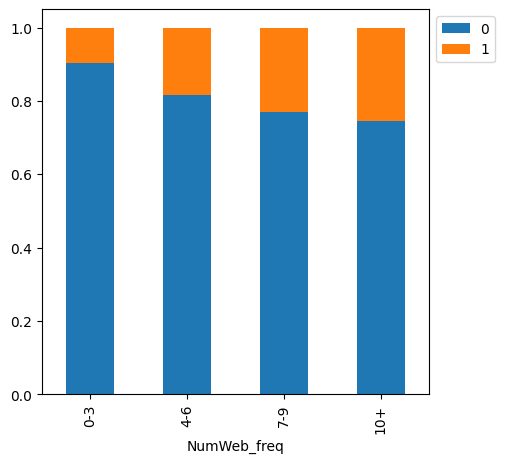

In [62]:
stacked_barplot(newdf, "NumWeb_freq", "Response")

Tabel diatas juga menunjukan bahwa semakin banyak pembelian yang dilakukan oleh customer lewat Web (NumWebPurchases),semakin banyak pula customer yang membeli membership.

### NumCatalogPurchases & Response

In [63]:
newdf['NumCatalogPurchases'].unique()

array([ 4,  3,  2,  0,  1,  7, 10,  6,  8,  5,  9, 11, 28, 22])

In [64]:
#Pengelompokan NumCatalogPurchases
def Cat_1 (x) :
    if x<=3 :
        return '0-3'
    elif x<=6 :
        return '4-6'
    elif x<=9 :
        return '7-9'  
    else :
        return '10+'

In [65]:
#dilakukan penambahan kolom baru untuk feature NumCatalogPurchases  yang telah di modifikasi untuk memudahkan analisa
newdf['NumCat_freq'] = newdf['NumCatalogPurchases'].apply(Cat_1)

Response        0    1   All
NumCat_freq                 
All          1879  333  2212
0-3          1363  158  1521
4-6           345  100   445
7-9           133   43   176
10+            38   32    70
------------------------------------------------------------------------------------------------------------------------


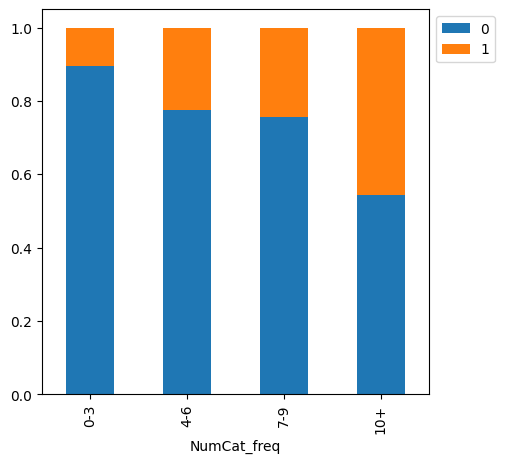

In [66]:
stacked_barplot(newdf, "NumCat_freq", "Response")

Masih selaras dengan data diatas sebelumnya,semakin banyak pembelian yang dilakukan lewat katalog (NumCatalogPurchases),semakin banyak pula customer yang membeli membership.

### NumStorePurchases & Response

In [67]:
newdf['NumStorePurchases'].unique()

array([ 6,  7,  5,  2,  3,  9, 10,  0,  8,  4, 13, 12,  1, 11])

In [68]:
#Pengelompokan NumStorePurchases
def Str_1 (x) :
    if x<=3 :
        return '0-3'
    elif x<=6 :
        return '4-6'
    elif x<=9 :
        return '7-9'  
    else :
        return '10+'

In [69]:
#dilakukan penambahan kolom baru untuk feature NumStorePurchases  yang telah di modifikasi untuk memudahkan analisa
newdf['NumStr_freq'] = newdf['NumStorePurchases'].apply(Str_1)

Response        0    1   All
NumStr_freq                 
All          1879  333  2212
0-3           643   78   721
4-6           584  122   706
10+           337   54   391
7-9           315   79   394
------------------------------------------------------------------------------------------------------------------------


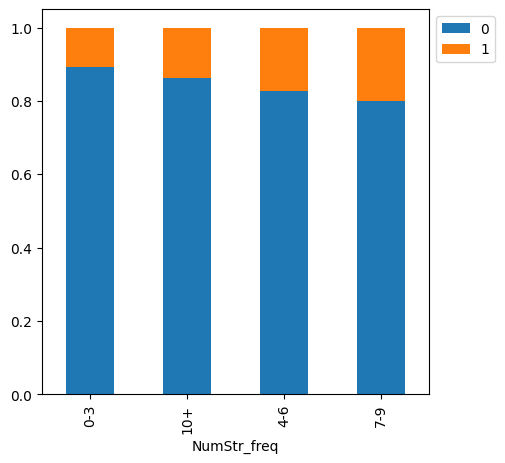

In [70]:
stacked_barplot(newdf, "NumStr_freq", "Response")

Pembelian di toko secara langsung (NumStorePurchases) menunjukan tren yang sedikit beda,dimana tren sebelumnya menunjukan jika semakin banyak pembelian yang dilakukan,semakin banyak pula customer yang membeli membership. Namun dapat dilihat bahwa customer yang melakukan pembelian 7 - 9 kali lah yang paling banyak membeli membership. Tetapi secara keseluruhan, tren masih menunjukan peningkatan pembelian membership yang diiringi dengan peningkatan frekuensi pembelian.

Observations :
- Analisa frekuensi marketing channel terhadap variabel target (Response) menunjukan korelasi yang positif, dimana ke 4 marketing channel yang ada secara keseluruhan menggambarkan insight bahwa semakin banyak pembelian yang dilakukan customer pada setiap marketing channel, semakin banyak juga pembelian membership.
- Poin no 1 diatas memiliki insight yang beriringan dengan analisa pada jenis produk yang dijual,dimana semakin banyak uang yang dihabiskan customer untuk membeli suatu produk,semakin banyak juga membership yang terjual.
- Kesimpulannya semakin banyak uang yang dihabiskan dan pembelanjaan yang dilakukan,semakin banyak juga membership yang dibeli oleh customer. karena kita asumsikan semakin banyak pembelian yang dilakukan semakin banyak pula uang yang dihabiskan.

# 4. Apakah semakin banyak uang yang dihabiskan oleh customer mempengaruhi pembelian membership?

In [71]:
#menambahkan kolom total_spent
newdf["Total_Spent"] = newdf[
    [
        "MntWines",
        "MntFruits",
        "MntMeatProducts",
        "MntFishProducts",
        "MntSweetProducts",
        "MntGoldProds",
    ]
].sum(axis=1)

In [72]:
#Pengelompokan Total_Purchases
def Pur_1 (x) :
    if x<=400 :
        return '0 - 400 USD'
    elif x<=800 :
        return '401 - 800 USD'
    elif x<=1200 :
        return '801 - 1200 USD' 
    elif x<=1600 :
        return '1201 - 1600 USD'
    else :
        return '>1600 USD'

In [73]:
#dilakukan penambahan kolom baru untuk feature Total_Spent  yang telah di modifikasi untuk memudahkan analisa
newdf['TotSpent_Cat'] = newdf['Total_Spent'].apply(Pur_1)

In [74]:
Tot_1 = pd.concat([newdf], axis= 1).groupby(['TotSpent_Cat']).agg(
    Resp =('Response', 'sum'),
    customer=('Response', 'count')
).reset_index()
Tot_1['Resp %'] = Tot_1['Resp']/Tot_1['customer']*100
Tot_1 = Tot_1.sort_values('Resp %', ascending=False)
Tot_1

,TotSpent_Cat,Resp,customer,Resp %
4,>1600 USD,85,185,45.945946
1,1201 - 1600 USD,56,228,24.561404
3,801 - 1200 USD,47,351,13.390313
2,401 - 800 USD,44,338,13.017751
0,0 - 400 USD,101,1110,9.099099


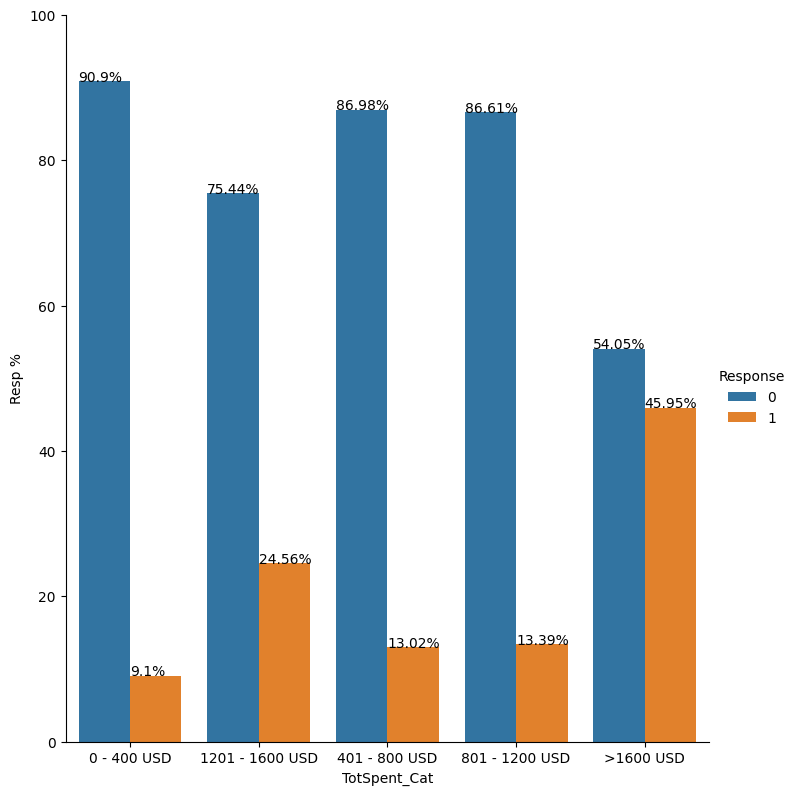

In [75]:
newdf1 = newdf.copy()
x,y = 'TotSpent_Cat', 'Response'

newdf1 = newdf1.groupby(x)[y].value_counts(normalize=True)
newdf1 = newdf1.mul(100)
newdf1 = newdf1.rename('Resp %').reset_index()

g = sns.catplot(x=x,y='Resp %',hue=y,kind='bar',height=8, aspect=.9,data=newdf1)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)


Observations :
- Secara persentase customer dengan nominal pembelanjaan diatas 1600 USD memiliki tingkat rate membership yang sangat tinggi,hampir 50% atau setenganya dari jumlah customer yang ada.
- Seiring nominal pembelanjaan membesar,persentase pembelian membership juga meningkat

# 5. Apakah semakin tinggi income mempengaruhi total pengeluaran untuk belanja?


Text(0.5, 1.0, 'Income vs Total_Spent')

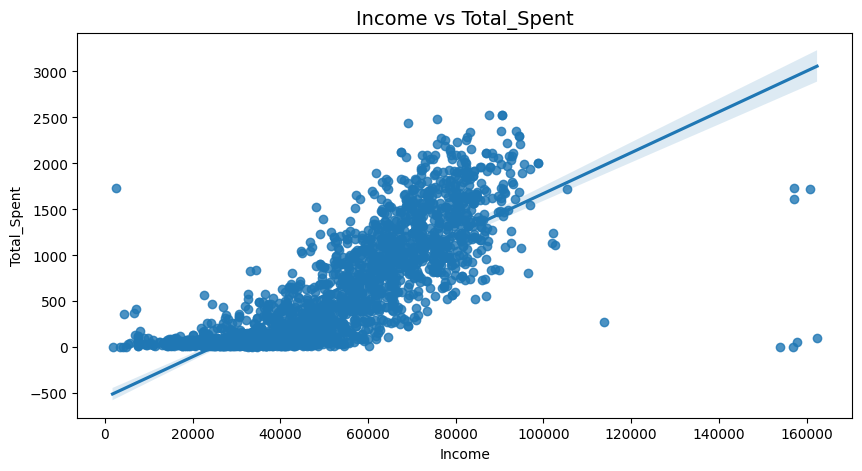

In [76]:
plt.figure(figsize=(10, 5))
sns.regplot(y=newdf.Total_Spent, x=newdf.Income)
plt.title('Income vs Total_Spent',fontsize=14)

Observations :
- Income dan Total Spent memiliki korelasi yang positif satu sama lain.
- Jumlah Total Spent yang ada tidak jauh berbeda untuk customer dengan range Income 0 sampai 60.000, perbedaan yang siginifikan dapat terlihat pada customer dengan range income diatas 60.000 hingga 100.000


# 6. Apakah penyebab customer dengan marital status widow membeli lebih banyak membership?


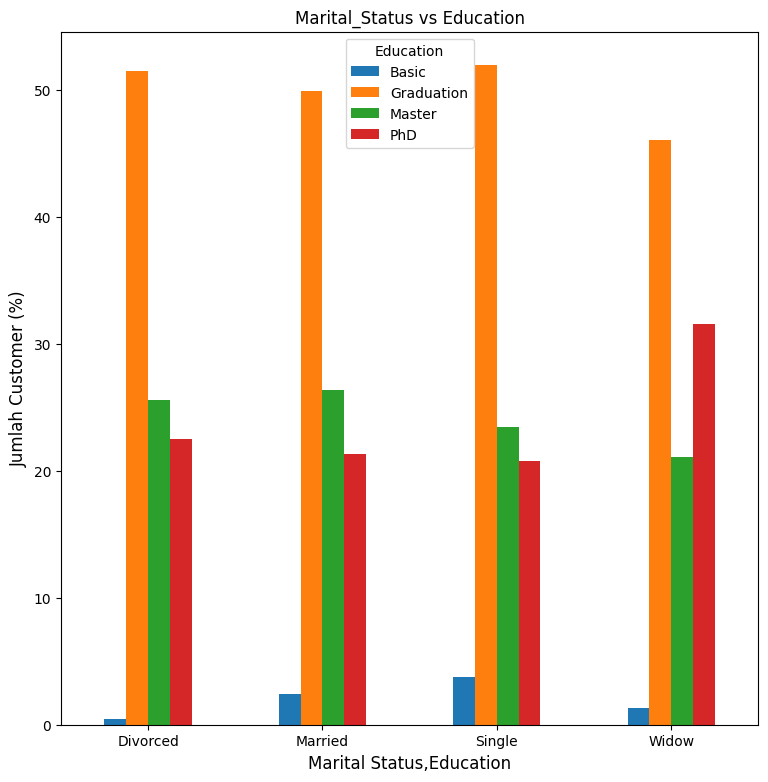

In [77]:
((pd.crosstab(newdf['Marital_Status'],newdf['Education']).apply(lambda x:x/x.sum(),axis=1))*100).plot(kind='bar',figsize=(9,9))
plt.title('Marital_Status vs Education',fontsize=12) 
plt.xlabel('Marital Status,Education',fontsize=12)
plt.ylabel('Jumlah Customer (%)',fontsize=12)
plt.xticks(rotation=0);

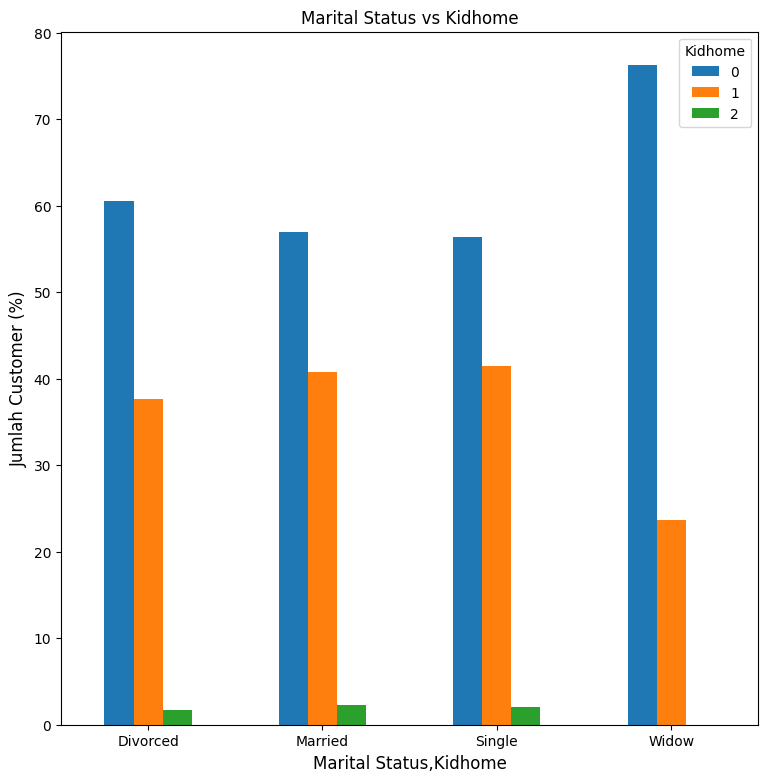

In [78]:
((pd.crosstab(newdf['Marital_Status'],newdf['Kidhome']).apply(lambda x:x/x.sum(),axis=1))*100).plot(kind='bar',figsize=(9,9))
plt.title('Marital Status vs Kidhome',fontsize=12) 
plt.xlabel('Marital Status,Kidhome',fontsize=12)
plt.ylabel('Jumlah Customer (%)',fontsize=12)
plt.xticks(rotation=0);

Dari data di atas dapat dilihat jika customer dengan marital status widow memiliki persentase lulusan PHD paling besar diantara marital status lainnya dan juga mayoritas dari mereka tidak memiliki anak kecil di rumahnya (Kidhome). Hal tersebut dapat dibuktikan pada poin Education & Response dan juga Kidhome & Response dimana masing-masing menunjukan jika lulusan PHD dan tidak memiliki anak kecil lebih cenderung membeli membership.


# 7. Bagaimana tren nominal pembelanjaan konsumen di Superstore dari tahun 2012 - 2014? dan Bagaimana tren mingguannya?

<Axes: xlabel='reg_year,reg_month'>

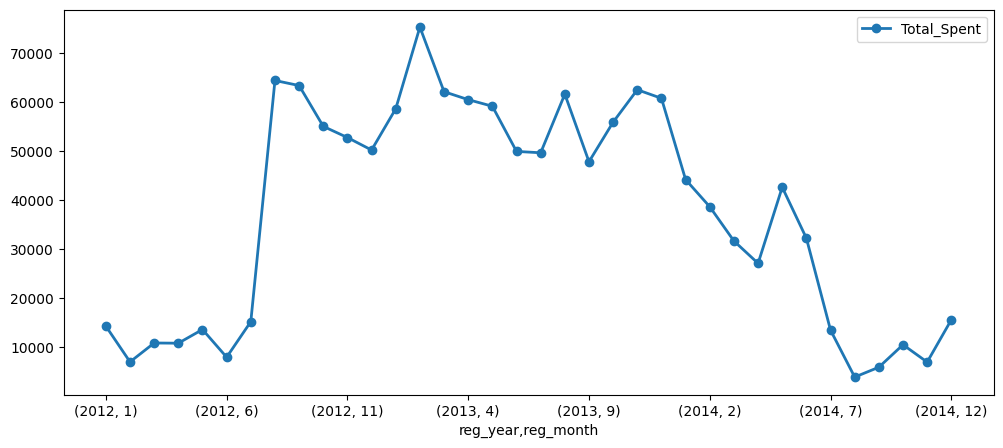

In [79]:
pd.pivot_table(
    data=newdf,
    index=["reg_year", "reg_month"],
    values="Total_Spent",
    aggfunc=np.sum, 
).plot(kind="line", marker="o", linewidth=2, figsize=(12, 5))

Observations :
- Data diatas menunjukan tren nominal pembelanjaan yang terus meningkat pada tahun 2012 sampai awal tahun 2013,setelahnya tren mengalami penurunan yang tajam hingga akhir tahun 2014,hingga nominal pembelanjaannya hampir kembali ke awal tahun 2012.


In [80]:
#Pengelompokan reg_day
def week_1 (x) :
    if x<=7 :
        return 'Week 1'
    elif x<=14 :
        return 'Week 2'
    elif x<=21 :
        return 'Week 3'  
    else :
        return 'Week 4'

In [81]:
#dilakukan penambahan kolom baru untuk feature reg_day  yang telah di modifikasi untuk memudahkan analisa
newdf['Week_Cat'] = newdf['reg_day'].apply(week_1)

<Axes: xlabel='Week_Cat'>

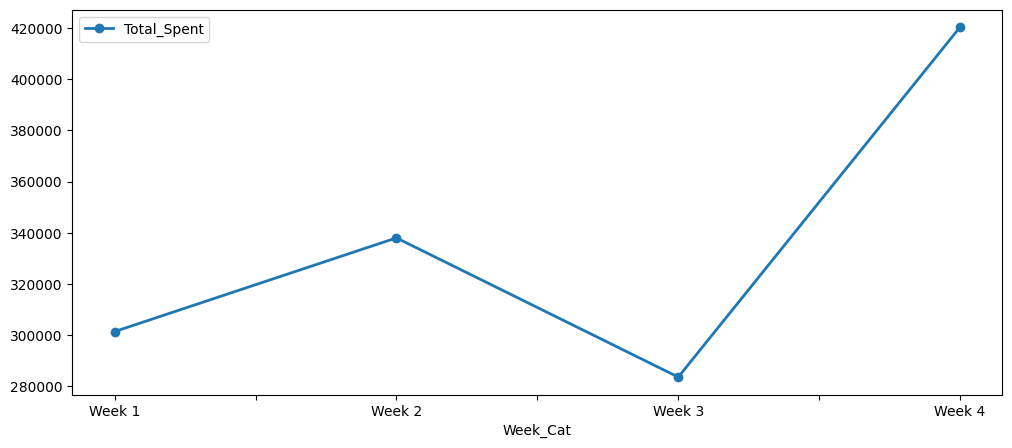

In [82]:
pd.pivot_table(
    data=newdf,
    index=["Week_Cat"],
    values="Total_Spent",
    aggfunc=np.sum,
).plot(kind="line", marker="o", linewidth=2, figsize=(12, 5))

Oberservations :
- Secara Tren mingguan untuk nominal pembelanjaan dari week 1 ke week 2 mengalami peningkatan,namun menurun lagi secara tren bahkan ke level dibawah week 1. Tetapi pada week 3 secara melesat meningkat hampir 30% dalam 1 minggu.
- Uptrend line yang terdapat di week 3 terjadi karena kita asumsikan tanggal gajian orang-orang tepat di tanggal 25 atau week 3,disitulah terjadi pembelanjaan secara masif oleh para customer.

# Data Preprocessing

## Split Data (Training & Testing)

In [83]:
newdf_8 = newdf.copy()

In [84]:
#split The Data
from sklearn.model_selection import train_test_split
X = newdf_8.drop(columns='Response', axis=1)
y = newdf_8['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Train Data

In [85]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1769 entries, 1980 to 863
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            1769 non-null   object 
 1   Marital_Status       1769 non-null   object 
 2   Income               1769 non-null   float64
 3   Kidhome              1769 non-null   int64  
 4   Teenhome             1769 non-null   int64  
 5   Recency              1769 non-null   int64  
 6   MntWines             1769 non-null   int64  
 7   MntFruits            1769 non-null   int64  
 8   MntMeatProducts      1769 non-null   int64  
 9   MntFishProducts      1769 non-null   int64  
 10  MntSweetProducts     1769 non-null   int64  
 11  MntGoldProds         1769 non-null   int64  
 12  NumDealsPurchases    1769 non-null   int64  
 13  NumWebPurchases      1769 non-null   int64  
 14  NumCatalogPurchases  1769 non-null   int64  
 15  NumStorePurchases    1769 non-null  

## Feature Engineering

In [86]:
## Rank Encoding
X_train['age_cat'] = X_train['age_cat'].replace(['20-30','31-40','41-50','51-60','61-70','71+'],[1,2,3,4,5,6])
X_train['Recency_cat'] = X_train['Recency_cat'].replace(['0-20','21-40','41-60','61-80','80+'],[1,2,3,4,5])
X_train['Income_cat'] = X_train['Income_cat'].replace(['<= 50000','<= 100000','<= 150000','> 150000'],[1,2,3,4])
X_train['NumDeals_freq'] = X_train['NumDeals_freq'].replace(['0-3','4-6','7-9','10+'],[1,2,3,4])
X_train['NumWeb_freq'] = X_train['NumWeb_freq'].replace(['0-3','4-6','7-9','10+'],[1,2,3,4])
X_train['NumCat_freq'] = X_train['NumCat_freq'].replace(['0-3','4-6','7-9','10+'],[1,2,3,4])
X_train['NumStr_freq'] = X_train['NumStr_freq'].replace(['0-3','4-6','7-9','10+'],[1,2,3,4])
X_train['TotSpent_Cat'] = X_train['TotSpent_Cat'].replace(['0 - 400 USD','401 - 800 USD','801 - 1200 USD','1201 - 1600 USD','>1600 USD'],[1,2,3,4,5])
X_train['Week_Cat'] = X_train['Week_Cat'].replace(['Week 1','Week 2','Week 3','Week 4'],[1,2,3,4])



#One Hot Encoding
X_train= pd.get_dummies(X_train,columns=['Education','Marital_Status'])

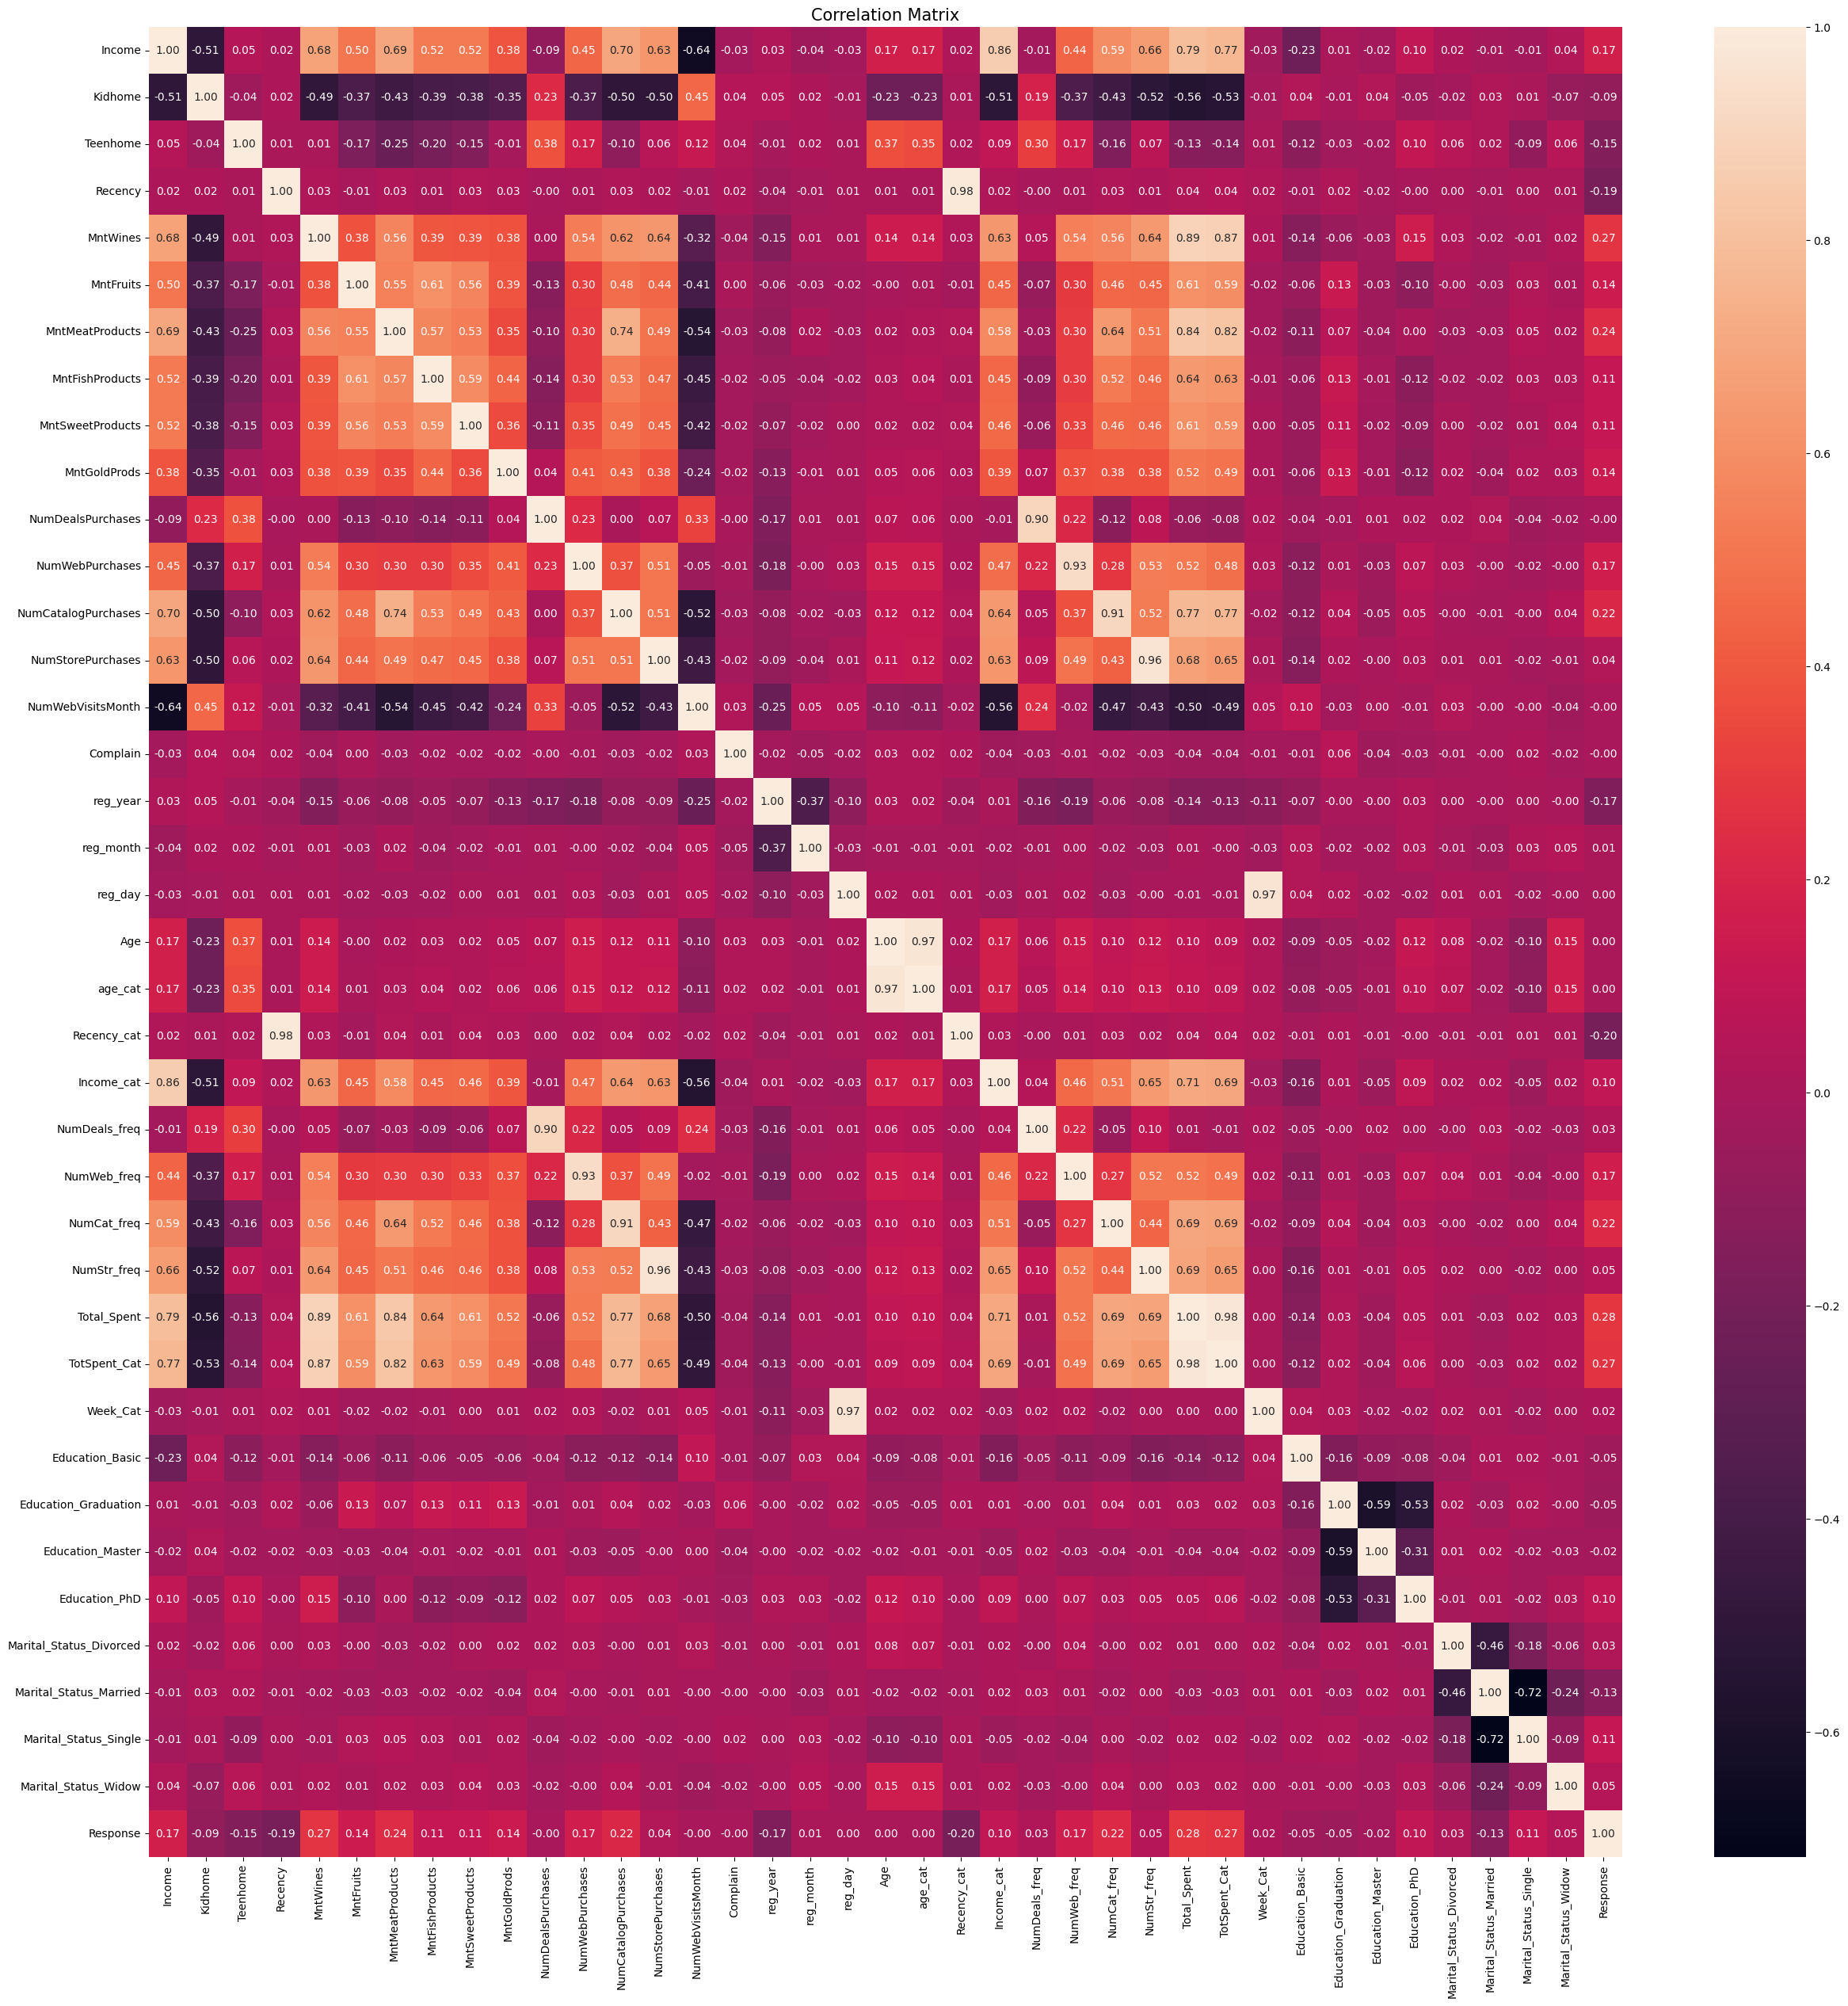

In [87]:
newdf_train = pd.concat([X_train, y_train], axis=1)
corr = newdf_train.corr()

plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Correlation Matrix',fontsize = 15)
plt.show()

Observations :
- Fitur Income dan Income_cat saling berkorelasi satu sama lain (threshold >= 0.8). Fitur *Income_cat* akan di drop karena hanya memiliki korelasi 0.10 dengan target variable.
- Fitur Recency dan Recency_cat saling berkorelasi satu sama lain (threshold >= 0.8). Fitur *Recency* akan di drop karena hanya memiliki korelasi 0.19 dengan target variable.
- Fitur MntWines, Total_Spent dan TotSpent_Cat saling berkorelasi satu sama lain (threshold >= 0.8). Fitur *MntWines* dan *TotSpent_Cat* akan di drop karena hanya memiliki korelasi 0.27 dengan target variable.
- Fitur MntMeatProducts,Total_Spent dan TotSpent_Cat saling berkorelasi satu sama lain (threshold >= 0.8). Fitur *MntMeatProducts* dan *TotSpent_Cat*  akan di drop karena hanya memiliki korelasi 0.24 dan 0.27 dengan target variable.
- Fitur NumDealsPurchases dan NumDeals_freq saling berkorelasi satu sama lain (threshold >= 0.8). Fitur *NumDealsPurchases* akan di drop karena hanya memiliki korelasi 0.00 dengan target variable.
- Fitur NumWebPurchases dan NumWeb_freq saling berkorelasi satu sama lain (threshold >= 0.8). kedua fitur tersebut memiliki nilai korelasi yang sama terhadap target variable sehingga tidak ada yang di drop.
- Fitur NumCatalogPurchases dan NumCat_freq saling berkorelasi satu sama lain (threshold >= 0.8). kedua fitur tersebut memiliki nilai korelasi yang sama terhadap target variable sehingga tidak ada yang di drop.
- Fitur NumStorePurchases dan NumStr_freq saling berkorelasi satu sama lain (threshold >= 0.8). Fitur *NumStorePurchases* akan di drop karena hanya memiliki korelasi 0.04 dengan target variable.
- Fitur reg_day dan Week_Cat saling berkorelasi satu sama lain (threshold >= 0.8). Fitur *reg_day* akan di drop karena hanya memiliki korelasi 0.00 dengan target variable.
- Fitur Age dan age_cat saling berkorelasi satu sama lain (threshold >= 0.8). kedua fitur tersebut memiliki nilai korelasi yang sama terhadap target variable sehingga tidak ada yang di drop.









In [88]:
X_train = X_train.drop(['Income_cat','Recency','MntWines','MntMeatProducts','TotSpent_Cat','NumDealsPurchases','NumStorePurchases','reg_day'],axis=1)

### Test Data

In [89]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 858 to 844
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            443 non-null    object 
 1   Marital_Status       443 non-null    object 
 2   Income               443 non-null    float64
 3   Kidhome              443 non-null    int64  
 4   Teenhome             443 non-null    int64  
 5   Recency              443 non-null    int64  
 6   MntWines             443 non-null    int64  
 7   MntFruits            443 non-null    int64  
 8   MntMeatProducts      443 non-null    int64  
 9   MntFishProducts      443 non-null    int64  
 10  MntSweetProducts     443 non-null    int64  
 11  MntGoldProds         443 non-null    int64  
 12  NumDealsPurchases    443 non-null    int64  
 13  NumWebPurchases      443 non-null    int64  
 14  NumCatalogPurchases  443 non-null    int64  
 15  NumStorePurchases    443 non-null    i

### Feature Engineering

In [90]:
## Rank Encoding
X_test['age_cat'] = X_test['age_cat'].replace(['20-30','31-40','41-50','51-60','61-70','71+'],[1,2,3,4,5,6])
X_test['Recency_cat'] = X_test['Recency_cat'].replace(['0-20','21-40','41-60','61-80','80+'],[1,2,3,4,5])
X_test['Income_cat'] = X_test['Income_cat'].replace(['<= 50000','<= 100000','<= 150000','> 150000'],[1,2,3,4])
X_test['NumDeals_freq'] = X_test['NumDeals_freq'].replace(['0-3','4-6','7-9','10+'],[1,2,3,4])
X_test['NumWeb_freq'] = X_test['NumWeb_freq'].replace(['0-3','4-6','7-9','10+'],[1,2,3,4])
X_test['NumCat_freq'] = X_test['NumCat_freq'].replace(['0-3','4-6','7-9','10+'],[1,2,3,4])
X_test['NumStr_freq'] = X_test['NumStr_freq'].replace(['0-3','4-6','7-9','10+'],[1,2,3,4])
X_test['TotSpent_Cat'] = X_test['TotSpent_Cat'].replace(['0 - 400 USD','401 - 800 USD','801- 1200 USD','1201 - 1600 USD','>1600 USD'],[1,2,3,4,5])
X_test['Week_Cat'] = X_test['Week_Cat'].replace(['Week 1','Week 2','Week 3','Week 4'],[1,2,3,4])


#One Hot Encoding
X_test= pd.get_dummies(X_test,columns=['Education','Marital_Status'])


In [91]:
X_test = X_test.drop(['Income_cat','Recency','MntWines','MntMeatProducts','TotSpent_Cat','NumDealsPurchases','NumStorePurchases','reg_day'],axis=1)

# Modelling

In [92]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

def train(model, hp, X_train, y_train, X_test, y_test):
  # Modelling
  model_gridcv = GridSearchCV(model, hp, cv=5, scoring='recall')
  model_gridcv.fit(X_train, y_train)

  cv_result = pd.DataFrame(model_gridcv.cv_results_)
  retain_cols = ['params','mean_test_score', 'rank_test_score']
  cv_result2 = cv_result[retain_cols].sort_values('rank_test_score')
  print(cv_result2.drop('rank_test_score', axis = 1))

  # Evaluation
  fig, ax = plt.subplots(figsize=(10,7))
  y_pred = model_gridcv.best_estimator_.predict(X_test)

  cm = confusion_matrix(y_test, y_pred, labels=model_gridcv.best_estimator_.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model_gridcv.best_estimator_.classes_)
  disp.plot(ax=ax)
  plt.show()

  y_pred = model_gridcv.best_estimator_.predict(X_test)
  print(classification_report(y_test, y_pred))  

## Hyperparameter Tuning

### KNN Model

                                       params  mean_test_score
1   {'n_neighbors': 2, 'weights': 'distance'}         0.308853
5   {'n_neighbors': 4, 'weights': 'distance'}         0.232511
3   {'n_neighbors': 3, 'weights': 'distance'}         0.224964
7   {'n_neighbors': 5, 'weights': 'distance'}         0.224891
11  {'n_neighbors': 7, 'weights': 'distance'}         0.224891
13  {'n_neighbors': 8, 'weights': 'distance'}         0.217489
9   {'n_neighbors': 6, 'weights': 'distance'}         0.213498
2    {'n_neighbors': 3, 'weights': 'uniform'}         0.167562
6    {'n_neighbors': 5, 'weights': 'uniform'}         0.148549
10   {'n_neighbors': 7, 'weights': 'uniform'}         0.140929
0    {'n_neighbors': 2, 'weights': 'uniform'}         0.087591
12   {'n_neighbors': 8, 'weights': 'uniform'}         0.083817
8    {'n_neighbors': 6, 'weights': 'uniform'}         0.076270
4    {'n_neighbors': 4, 'weights': 'uniform'}         0.068650


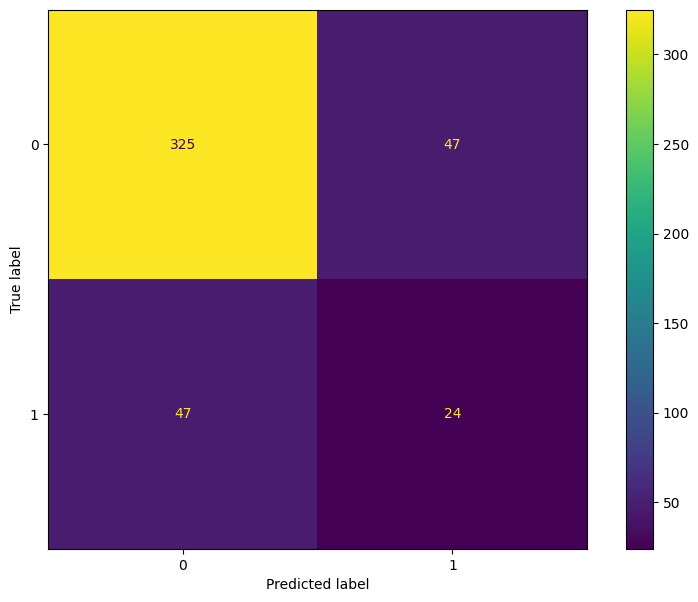

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       372
           1       0.34      0.34      0.34        71

    accuracy                           0.79       443
   macro avg       0.61      0.61      0.61       443
weighted avg       0.79      0.79      0.79       443



In [93]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn_parameters = {
    'n_neighbors': (2,3,4,5,6,7,8),
    'weights':('uniform','distance')
}

train(knn, knn_parameters, X_train, y_train, X_test, y_test)

- Score Terbaik untuk nilai K adalah 2 dengan weight = distance
- Model Hyperparameter Tuning KNN tidak terlalu bagus karena dari Recall populasi yang benar-benar membeli membership, model hanya dapat menangkap 34% diantaranya yang membeli membership.

### Logistic Regression Model

                                  params  mean_test_score
32      {'C': 10, 'solver': 'newton-cg'}         0.294049
27       {'C': 1, 'solver': 'newton-cg'}         0.294049
22     {'C': 0.1, 'solver': 'newton-cg'}         0.271045
17    {'C': 0.01, 'solver': 'newton-cg'}         0.171771
15        {'C': 0.01, 'solver': 'lbfgs'}         0.103338
10       {'C': 0.001, 'solver': 'lbfgs'}         0.099419
20         {'C': 0.1, 'solver': 'lbfgs'}         0.091655
12   {'C': 0.001, 'solver': 'newton-cg'}         0.087954
31      {'C': 10, 'solver': 'liblinear'}         0.084035
6   {'C': 0.0001, 'solver': 'liblinear'}         0.084035
5       {'C': 0.0001, 'solver': 'lbfgs'}         0.083962
26       {'C': 1, 'solver': 'liblinear'}         0.080261
21     {'C': 0.1, 'solver': 'liblinear'}         0.080261
16    {'C': 0.01, 'solver': 'liblinear'}         0.080261
0        {'C': 1e-05, 'solver': 'lbfgs'}         0.080261
11   {'C': 0.001, 'solver': 'liblinear'}         0.080261
1    {'C': 1e-

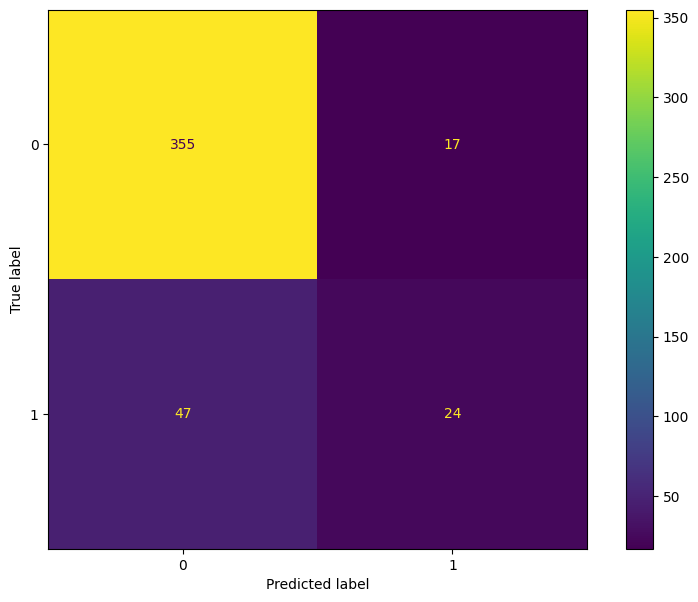

              precision    recall  f1-score   support

           0       0.88      0.95      0.92       372
           1       0.59      0.34      0.43        71

    accuracy                           0.86       443
   macro avg       0.73      0.65      0.67       443
weighted avg       0.84      0.86      0.84       443



In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)

lr_parameters = {
    'C' : (0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10),
    'solver': ('lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga')
}

train(lr, lr_parameters, X_train, y_train, X_test, y_test)

- Score terbaik untuk  Hyperparameter pada Logistic Regression adalah  C: 10 dengan solver: newton-cg.
- Model Hyperparameter Tuning Logistic Regression tidak terlalu bagus karena dari Recall populasi yang benar-benar membeli membership, model hanya dapat menangkap 32% diantaranya yang membeli membership.

### Decision Tree Model

              params  mean_test_score
9  {'max_depth': 10}         0.404862
8   {'max_depth': 9}         0.351016
7   {'max_depth': 8}         0.316763
6   {'max_depth': 7}         0.305225
5   {'max_depth': 6}         0.270972
4   {'max_depth': 5}         0.244267
3   {'max_depth': 4}         0.190856
1   {'max_depth': 2}         0.164006
2   {'max_depth': 3}         0.153048
0   {'max_depth': 1}         0.026415


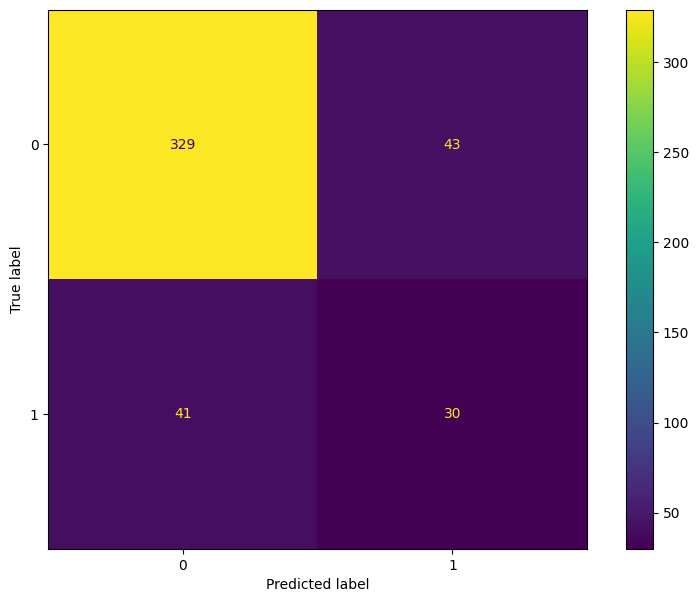

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       372
           1       0.41      0.42      0.42        71

    accuracy                           0.81       443
   macro avg       0.65      0.65      0.65       443
weighted avg       0.81      0.81      0.81       443



In [ ]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(random_state=42)

dt_parameters = {
    'max_depth':(1,2,3,4,5, 6, 7, 8, 9, 10)
}

train(dt, dt_parameters, X_train, y_train, X_test, y_test)

- Score terbaik untuk  Hyperparameter pada Decision Tree adalah max depth : 10.
- Model Hyperparameter Tuning Decision Tree tidak terlalu bagus karena dari Recall populasi yang benar-benar membeli membership, model hanya dapat menangkap 42% diantaranya yang membeli membership.

### Random forest Model

                                   params  mean_test_score
72    {'max_depth': 9, 'n_estimators': 2}         0.240856
82   {'max_depth': 10, 'n_estimators': 5}         0.236865
64    {'max_depth': 8, 'n_estimators': 5}         0.229245
63    {'max_depth': 8, 'n_estimators': 2}         0.225472
83  {'max_depth': 10, 'n_estimators': 10}         0.213861
..                                    ...              ...
24   {'max_depth': 3, 'n_estimators': 50}         0.000000
25   {'max_depth': 3, 'n_estimators': 60}         0.000000
26   {'max_depth': 3, 'n_estimators': 70}         0.000000
11   {'max_depth': 2, 'n_estimators': 10}         0.000000
0     {'max_depth': 1, 'n_estimators': 2}         0.000000

[90 rows x 2 columns]


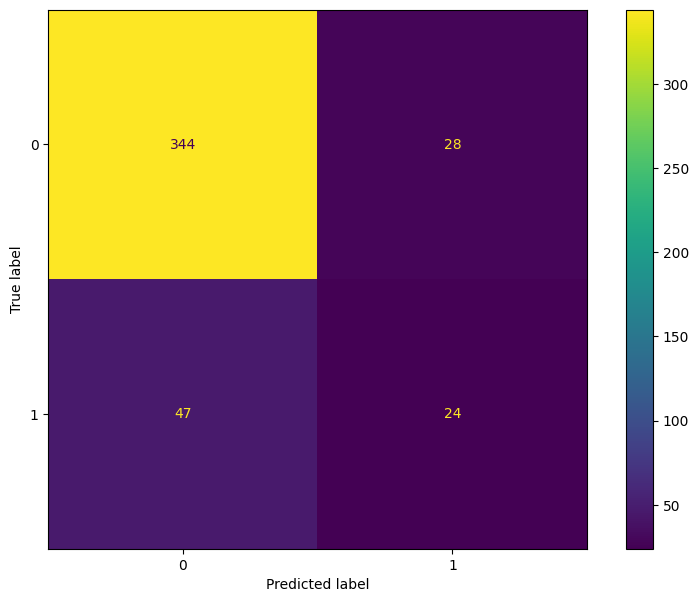

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       372
           1       0.46      0.34      0.39        71

    accuracy                           0.83       443
   macro avg       0.67      0.63      0.65       443
weighted avg       0.81      0.83      0.82       443



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf_parameters = {
    'n_estimators': (2, 5, 10, 20,30,40,50, 60, 70),
    'max_depth':(1,2,3,4,5, 6, 7, 8, 9, 10)
}

train(rf, rf_parameters, X_train, y_train, X_test, y_test)

- Score terbaik untuk  Hyperparameter pada Random Forest adalah max depth : 9 dan n_estimators : 2
- Model Hyperparameter Tuning Random Forest tidak terlalu bagus karena dari Recall populasi yang benar-benar membeli membership, model hanya dapat menangkap 34% diantaranya yang membeli membership.

### XGBoost Model

                                               params  mean_test_score
23  {'learning_rate': 0.15, 'max_depth': 5, 'n_est...         0.423803
32  {'learning_rate': 0.2, 'max_depth': 5, 'n_esti...         0.420174
17  {'learning_rate': 0.1, 'max_depth': 7, 'n_esti...         0.412554
22  {'learning_rate': 0.15, 'max_depth': 5, 'n_est...         0.412482
35  {'learning_rate': 0.2, 'max_depth': 7, 'n_esti...         0.408563
14  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...         0.408418
26  {'learning_rate': 0.15, 'max_depth': 7, 'n_est...         0.401234
34  {'learning_rate': 0.2, 'max_depth': 7, 'n_esti...         0.397242
31  {'learning_rate': 0.2, 'max_depth': 5, 'n_esti...         0.397170
16  {'learning_rate': 0.1, 'max_depth': 7, 'n_esti...         0.389623
33  {'learning_rate': 0.2, 'max_depth': 7, 'n_esti...         0.389550
29  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...         0.389260
20  {'learning_rate': 0.15, 'max_depth': 3, 'n_est...         0.389260
8   {'

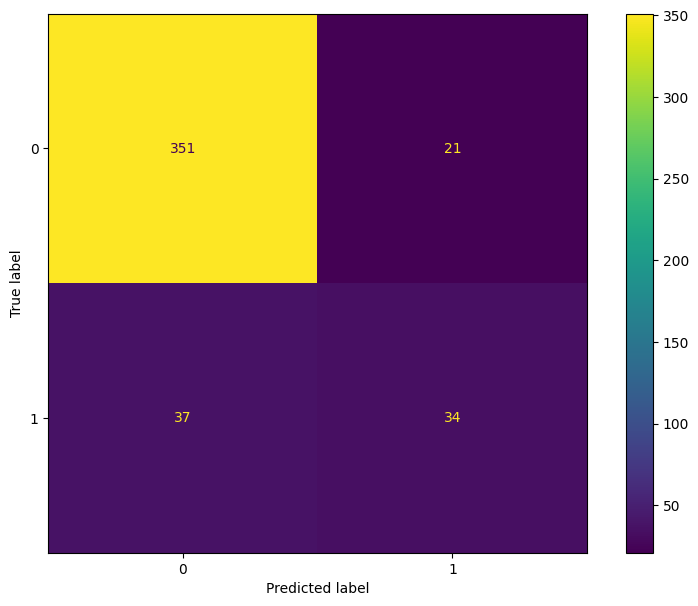

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       372
           1       0.62      0.48      0.54        71

    accuracy                           0.87       443
   macro avg       0.76      0.71      0.73       443
weighted avg       0.86      0.87      0.86       443



In [ ]:
import xgboost as xgb

xg_boost = xgb.XGBClassifier(random_state=42)
xg_parameters = {
    'learning_rate': [0.05, 0.1, 0.15, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}
train(xg_boost, xg_parameters, X_train, y_train, X_test, y_test)

- Score terbaik untuk  Hyperparameter pada XGBoost adalah learning rate : 0,15 dan max_depth : 5
- Model Hyperparameter Tuning XGBoost tidak terlalu bagus karena dari Recall populasi yang benar-benar membeli membership, model hanya dapat menangkap 48% diantaranya yang membeli membership.

# Oversampling SMOTE

In [95]:
from imblearn import over_sampling

x_over, y_over = over_sampling.SMOTE().fit_resample(X_train, y_train)

In [ ]:
y_over.value_counts()

0    1507
1    1507
Name: Response, dtype: int64

### KNN Model

                                       params  mean_test_score
5   {'n_neighbors': 4, 'weights': 'distance'}         0.876566
3   {'n_neighbors': 3, 'weights': 'distance'}         0.873908
7   {'n_neighbors': 5, 'weights': 'distance'}         0.870595
9   {'n_neighbors': 6, 'weights': 'distance'}         0.869268
13  {'n_neighbors': 8, 'weights': 'distance'}         0.869261
11  {'n_neighbors': 7, 'weights': 'distance'}         0.865950
1   {'n_neighbors': 2, 'weights': 'distance'}         0.862626
2    {'n_neighbors': 3, 'weights': 'uniform'}         0.859312
6    {'n_neighbors': 5, 'weights': 'uniform'}         0.837414
10   {'n_neighbors': 7, 'weights': 'uniform'}         0.817513
4    {'n_neighbors': 4, 'weights': 'uniform'}         0.784322
8    {'n_neighbors': 6, 'weights': 'uniform'}         0.775057
12   {'n_neighbors': 8, 'weights': 'uniform'}         0.769730
0    {'n_neighbors': 2, 'weights': 'uniform'}         0.761099


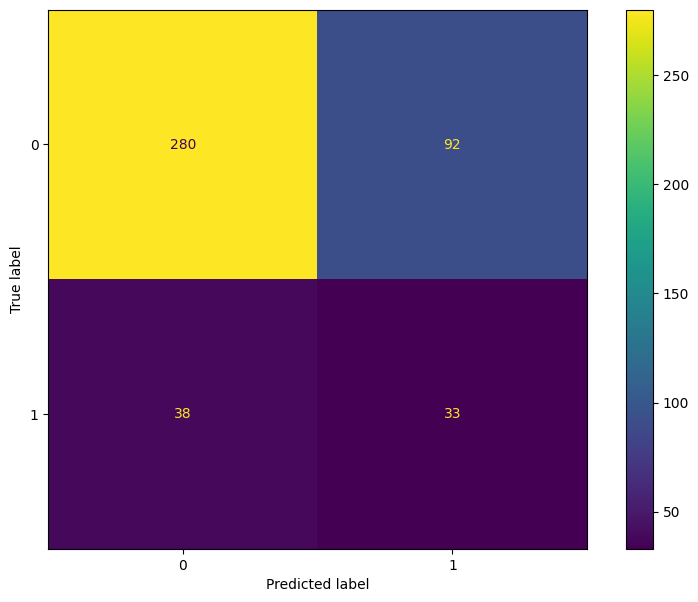

              precision    recall  f1-score   support

           0       0.88      0.75      0.81       372
           1       0.26      0.46      0.34        71

    accuracy                           0.71       443
   macro avg       0.57      0.61      0.57       443
weighted avg       0.78      0.71      0.74       443



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn_parameters = {
    'n_neighbors': (2,3,4,5,6,7,8),
    'weights':('uniform','distance')
}

train(knn, knn_parameters, x_over, y_over, X_test, y_test)

- Score Terbaik untuk nilai K adalah 5 dengan weight = distance
-  Setelah dilakukan Smote pada Model Hyperparameter Tuning KNN,model dapat menangkap presentase yang lebih besar terhadap customer yang membeli membership dari yang sebelumnya 34% menjadi 46%
.

### Logistic Regression Model

                                  params  mean_test_score
31      {'C': 10, 'solver': 'liblinear'}         0.864516
17    {'C': 0.01, 'solver': 'newton-cg'}         0.857895
21     {'C': 0.1, 'solver': 'liblinear'}         0.855244
22     {'C': 0.1, 'solver': 'newton-cg'}         0.852555
27       {'C': 1, 'solver': 'newton-cg'}         0.843253
16    {'C': 0.01, 'solver': 'liblinear'}         0.838661
32      {'C': 10, 'solver': 'newton-cg'}         0.835284
26       {'C': 1, 'solver': 'liblinear'}         0.833284
12   {'C': 0.001, 'solver': 'newton-cg'}         0.735839
11   {'C': 0.001, 'solver': 'liblinear'}         0.721243
29            {'C': 1, 'solver': 'saga'}         0.611780
24          {'C': 0.1, 'solver': 'saga'}         0.611780
19         {'C': 0.01, 'solver': 'saga'}         0.611780
14        {'C': 0.001, 'solver': 'saga'}         0.611780
34           {'C': 10, 'solver': 'saga'}         0.611780
9        {'C': 0.0001, 'solver': 'saga'}         0.611780
4         {'C'

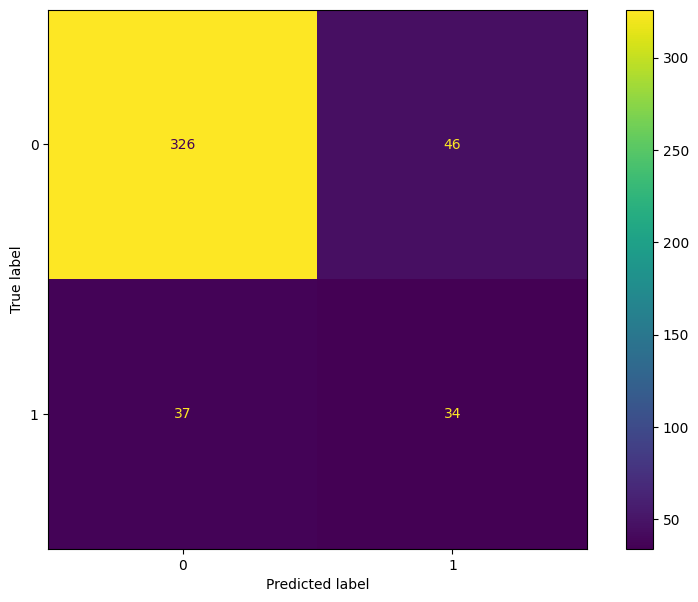

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       372
           1       0.42      0.48      0.45        71

    accuracy                           0.81       443
   macro avg       0.66      0.68      0.67       443
weighted avg       0.82      0.81      0.82       443



In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)

lr_parameters = {
    'C' : (0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10),
    'solver': ('lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga')
}

train(lr, lr_parameters, x_over, y_over, X_test, y_test)

- Score terbaik untuk  Hyperparameter pada Logistic Regression adalah  C: 10 dengan solver: liblinear.
- Setelah dilakukan Smote pada Model Hyperparameter Logistic Regression model dapat menangkap presentase yang lebih besar terhadap customer yang membeli membership dari yang sebelumnya 32% menjadi 48%

### Decision Tree Model

              params  mean_test_score
9  {'max_depth': 10}         0.881787
8   {'max_depth': 9}         0.877802
6   {'max_depth': 7}         0.874513
7   {'max_depth': 8}         0.865213
5   {'max_depth': 6}         0.849944
0   {'max_depth': 1}         0.841973
3   {'max_depth': 4}         0.828054
4   {'max_depth': 5}         0.814101
2   {'max_depth': 3}         0.699987
1   {'max_depth': 2}         0.660294


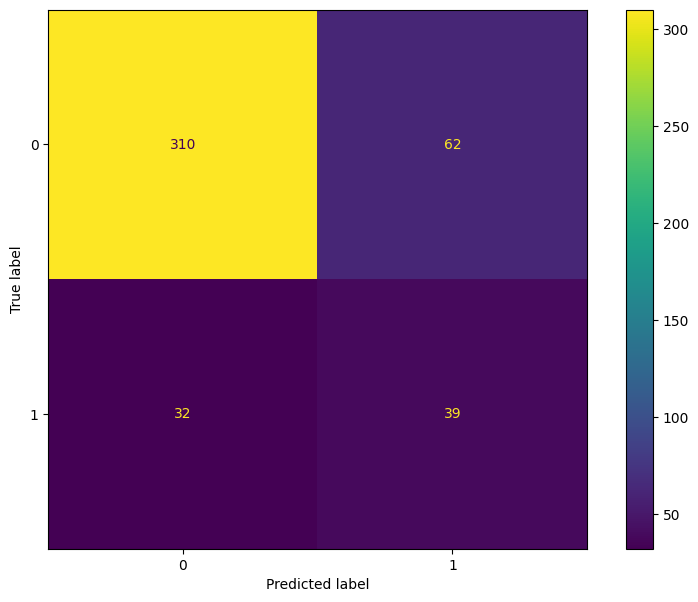

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       372
           1       0.39      0.55      0.45        71

    accuracy                           0.79       443
   macro avg       0.65      0.69      0.66       443
weighted avg       0.82      0.79      0.80       443



In [ ]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(random_state=42)

dt_parameters = {
    'max_depth':(1,2,3,4,5, 6, 7, 8, 9, 10)
}

train(dt, dt_parameters, x_over, y_over, X_test, y_test)

- Score terbaik untuk Hyperparameter pada Decision Tree adalah max_depth: 10.
- Setelah dilakukan Smote pada Model Decision Tree  model dapat menangkap presentase yang lebih besar terhadap customer yang membeli membership dari yang sebelumnya 42% menjadi 55%

### Random forest Model

                                   params  mean_test_score
89  {'max_depth': 10, 'n_estimators': 70}         0.912306
78   {'max_depth': 9, 'n_estimators': 50}         0.910994
87  {'max_depth': 10, 'n_estimators': 50}         0.910317
75   {'max_depth': 9, 'n_estimators': 20}         0.908997
88  {'max_depth': 10, 'n_estimators': 60}         0.908988
..                                    ...              ...
27    {'max_depth': 4, 'n_estimators': 2}         0.786876
18    {'max_depth': 3, 'n_estimators': 2}         0.752401
9     {'max_depth': 2, 'n_estimators': 2}         0.726545
1     {'max_depth': 1, 'n_estimators': 5}         0.723771
0     {'max_depth': 1, 'n_estimators': 2}         0.555983

[90 rows x 2 columns]


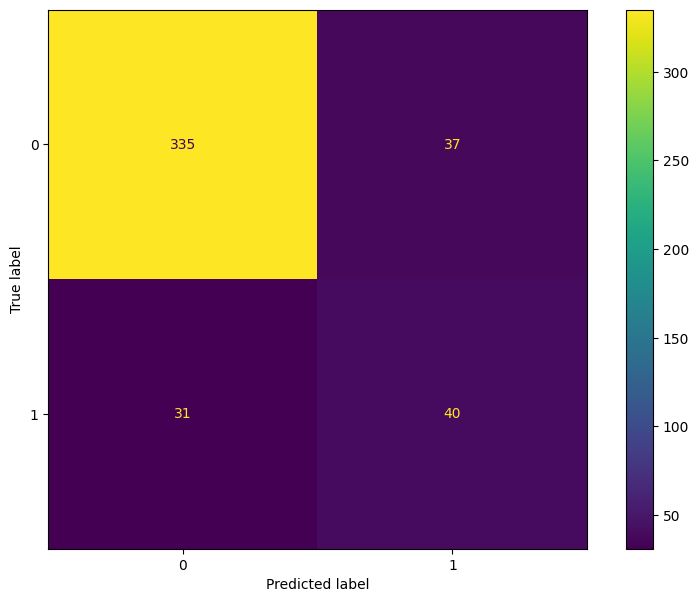

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       372
           1       0.52      0.56      0.54        71

    accuracy                           0.85       443
   macro avg       0.72      0.73      0.72       443
weighted avg       0.85      0.85      0.85       443



In [96]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf_parameters = {
    'n_estimators': (2, 5, 10,20,30,40,50, 60, 70),
    'max_depth':(1,2,3,4,5, 6, 7, 8, 9, 10)
}

train(rf, rf_parameters, x_over, y_over, X_test, y_test)

- Score terbaik untuk  Hyperparameter pada Random Forest adalah max depth : 10 dan n_estimators : 70
- Setelah dilakukan Smote pada Model Random Forest Tree model dapat menangkap presentase yang lebih besar terhadap customer yang membeli membership dari yang sebelumnya 34% menjadi 56%

### XGBoost Model

                                               params  mean_test_score
25  {'learning_rate': 0.15, 'max_depth': 7, 'n_est...         0.895019
15  {'learning_rate': 0.1, 'max_depth': 7, 'n_esti...         0.894361
24  {'learning_rate': 0.15, 'max_depth': 7, 'n_est...         0.894357
5   {'learning_rate': 0.05, 'max_depth': 5, 'n_est...         0.894357
22  {'learning_rate': 0.15, 'max_depth': 5, 'n_est...         0.893692
14  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...         0.893692
33  {'learning_rate': 0.2, 'max_depth': 7, 'n_esti...         0.893690
16  {'learning_rate': 0.1, 'max_depth': 7, 'n_esti...         0.893028
7   {'learning_rate': 0.05, 'max_depth': 7, 'n_est...         0.892365
8   {'learning_rate': 0.05, 'max_depth': 7, 'n_est...         0.892365
30  {'learning_rate': 0.2, 'max_depth': 5, 'n_esti...         0.892363
17  {'learning_rate': 0.1, 'max_depth': 7, 'n_esti...         0.892361
34  {'learning_rate': 0.2, 'max_depth': 7, 'n_esti...         0.892361
35  {'

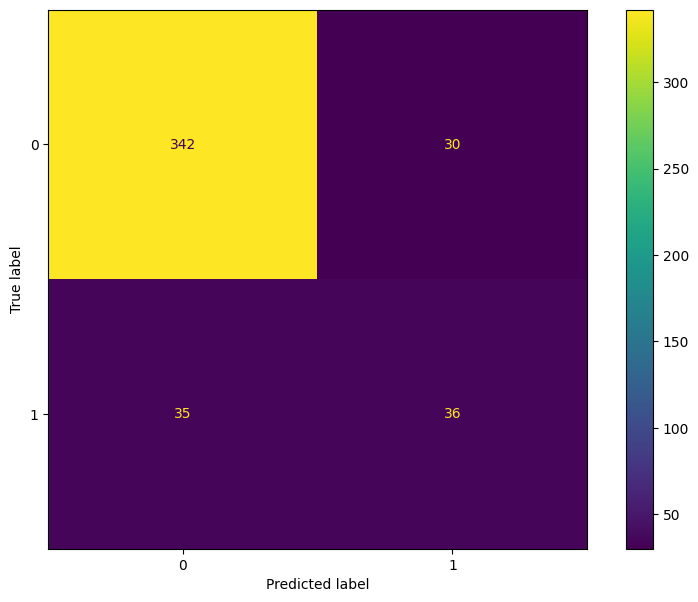

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       372
           1       0.55      0.51      0.53        71

    accuracy                           0.85       443
   macro avg       0.73      0.71      0.72       443
weighted avg       0.85      0.85      0.85       443



In [ ]:
import xgboost as xgb

xg_boost = xgb.XGBClassifier(random_state=42)

xg_parameters = {
    'learning_rate': [0.05, 0.1, 0.15, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}
train(xg_boost, xg_parameters, x_over, y_over, X_test, y_test)

- Score terbaik untuk  Hyperparameter pada XGBoost adalah learning rate : 0,15 dan max_depth : 7
-  Setelah dilakukan Smote pada Model XGBoost, model dapat menangkap persentase yang lebih ebsar terhadap customer yang membeli membership dari yang sebelumnya 48% menjadi 51%


# Undersampling

In [ ]:
from imblearn import under_sampling

x_under, y_under = under_sampling.RandomUnderSampler().fit_resample(X_train, y_train)

### KNN Model

                                       params  mean_test_score
11  {'n_neighbors': 7, 'weights': 'distance'}         0.614369
9   {'n_neighbors': 6, 'weights': 'distance'}         0.603048
7   {'n_neighbors': 5, 'weights': 'distance'}         0.599202
13  {'n_neighbors': 8, 'weights': 'distance'}         0.595428
1   {'n_neighbors': 2, 'weights': 'distance'}         0.591655
5   {'n_neighbors': 4, 'weights': 'distance'}         0.587808
10   {'n_neighbors': 7, 'weights': 'uniform'}         0.587663
3   {'n_neighbors': 3, 'weights': 'distance'}         0.584107
2    {'n_neighbors': 3, 'weights': 'uniform'}         0.561103
6    {'n_neighbors': 5, 'weights': 'uniform'}         0.553266
12   {'n_neighbors': 8, 'weights': 'uniform'}         0.450508
8    {'n_neighbors': 6, 'weights': 'uniform'}         0.446589
4    {'n_neighbors': 4, 'weights': 'uniform'}         0.446589
0    {'n_neighbors': 2, 'weights': 'uniform'}         0.393179


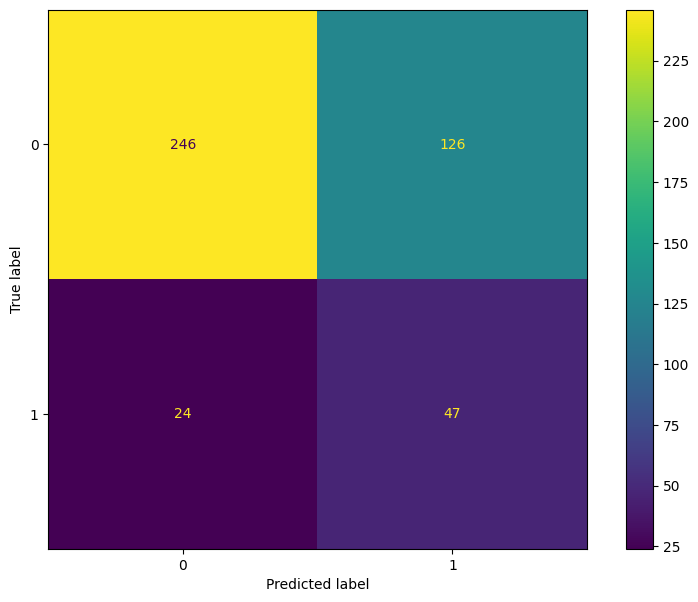

              precision    recall  f1-score   support

           0       0.91      0.66      0.77       372
           1       0.27      0.66      0.39        71

    accuracy                           0.66       443
   macro avg       0.59      0.66      0.58       443
weighted avg       0.81      0.66      0.71       443



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn_parameters = {
    'n_neighbors': (2,3,4,5,6,7,8),
    'weights':('uniform','distance')
}

train(knn, knn_parameters, x_under, y_under, X_test, y_test)

- Score Terbaik untuk nilai K adalah 7 dengan weight = distance
-  Setelah dilakukan Undersampling pada Model Hyperparameter Tuning KNN,model dapat menangkap presentase yang lebih besar terhadap customer yang membeli membership dari yang sebelumnya 34% (Tuning) menjadi 46% (Smote dan Tuning) dan terakhir menjadi 66% (Undersampling dan Tuning)
.

### Logistic Regression Model

                                  params  mean_test_score
31      {'C': 10, 'solver': 'liblinear'}         0.864516
17    {'C': 0.01, 'solver': 'newton-cg'}         0.857895
21     {'C': 0.1, 'solver': 'liblinear'}         0.855244
22     {'C': 0.1, 'solver': 'newton-cg'}         0.852555
27       {'C': 1, 'solver': 'newton-cg'}         0.843253
16    {'C': 0.01, 'solver': 'liblinear'}         0.838661
32      {'C': 10, 'solver': 'newton-cg'}         0.835284
26       {'C': 1, 'solver': 'liblinear'}         0.833284
12   {'C': 0.001, 'solver': 'newton-cg'}         0.735839
11   {'C': 0.001, 'solver': 'liblinear'}         0.721243
29            {'C': 1, 'solver': 'saga'}         0.611780
24          {'C': 0.1, 'solver': 'saga'}         0.611780
19         {'C': 0.01, 'solver': 'saga'}         0.611780
14        {'C': 0.001, 'solver': 'saga'}         0.611780
34           {'C': 10, 'solver': 'saga'}         0.611780
9        {'C': 0.0001, 'solver': 'saga'}         0.611780
4         {'C'

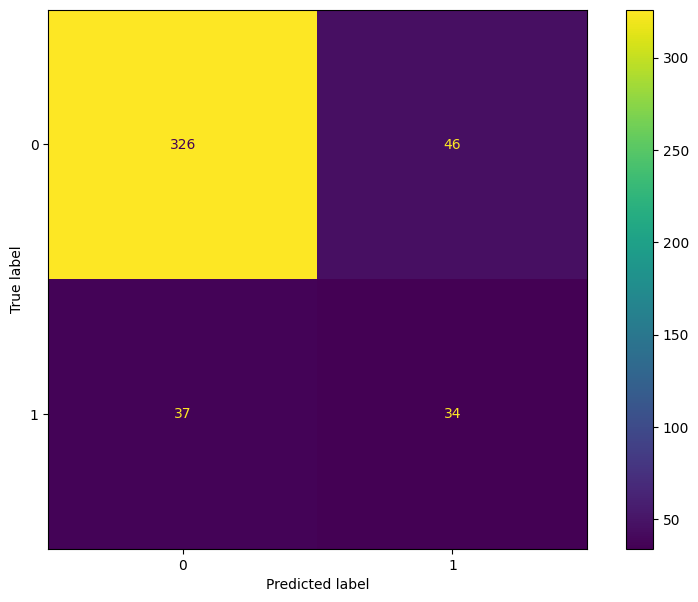

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       372
           1       0.42      0.48      0.45        71

    accuracy                           0.81       443
   macro avg       0.66      0.68      0.67       443
weighted avg       0.82      0.81      0.82       443



In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)

lr_parameters = {
    'C' : (0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10),
    'solver': ('lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga')
}

train(lr, lr_parameters, x_over, y_over, X_test, y_test)

- Score terbaik untuk  Hyperparameter pada Logistic Regression adalah  C: 10 dengan solver: liblinear.
- Setelah dilakukan Undersampling pada Model Hyperparameter Logistic Regression model dapat menangkap presentase yang lebih besar terhadap customer yang membeli membership dari yang sebelumnya 34% (Tuning) menjadi 48% (Smote dan Tuning) dan terakhir menjadi 48 % juga (Undersampling dan Tuning)

### Decision Tree Model

              params  mean_test_score
7   {'max_depth': 8}         0.725472
4   {'max_depth': 5}         0.698766
9  {'max_depth': 10}         0.687300
6   {'max_depth': 7}         0.683454
8   {'max_depth': 9}         0.679826
3   {'max_depth': 4}         0.679681
5   {'max_depth': 6}         0.676052
2   {'max_depth': 3}         0.664369
1   {'max_depth': 2}         0.603846
0   {'max_depth': 1}         0.458345


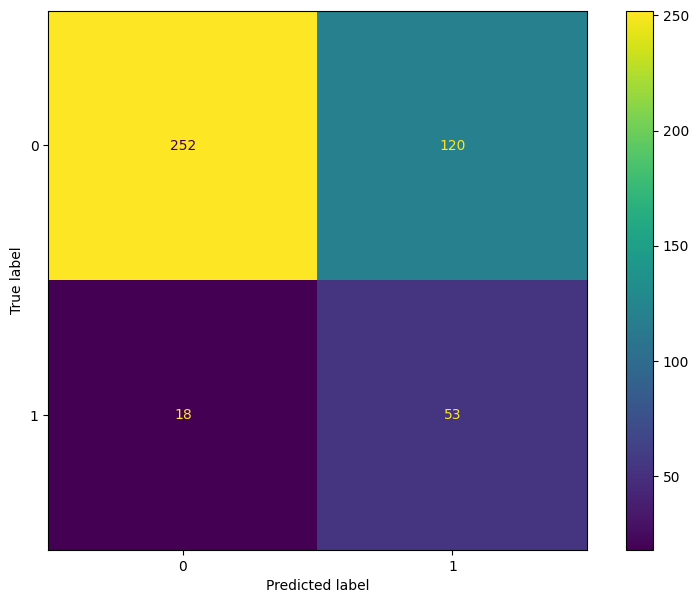

              precision    recall  f1-score   support

           0       0.93      0.68      0.79       372
           1       0.31      0.75      0.43        71

    accuracy                           0.69       443
   macro avg       0.62      0.71      0.61       443
weighted avg       0.83      0.69      0.73       443



In [ ]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(random_state=42)

dt_parameters = {
    'max_depth':(1,2,3,4,5, 6, 7, 8, 9, 10)
}

train(dt, dt_parameters, x_under, y_under, X_test, y_test)

- Score terbaik untuk Hyperparameter pada Decision Tree adalah max_depth: 8.
- Setelah dilakukan Undersampling pada Model Decision Tree  model dapat menangkap presentase yang lebih besar terhadap customer yang membeli membership dari yang sebelumnya 42% (Tuning) menjadi 55%(Smote dan Tuning) dan terakhir menjadi 75% (Undersampling dan Tuning)

### Random forest Model

                                  params  mean_test_score
78  {'max_depth': 9, 'n_estimators': 50}         0.774819
27   {'max_depth': 4, 'n_estimators': 2}         0.771045
80  {'max_depth': 9, 'n_estimators': 70}         0.767344
77  {'max_depth': 9, 'n_estimators': 40}         0.767271
38  {'max_depth': 5, 'n_estimators': 10}         0.767199
..                                   ...              ...
45   {'max_depth': 6, 'n_estimators': 2}         0.633745
8   {'max_depth': 1, 'n_estimators': 70}         0.633527
63   {'max_depth': 8, 'n_estimators': 2}         0.576415
72   {'max_depth': 9, 'n_estimators': 2}         0.534543
81  {'max_depth': 10, 'n_estimators': 2}         0.526851

[90 rows x 2 columns]


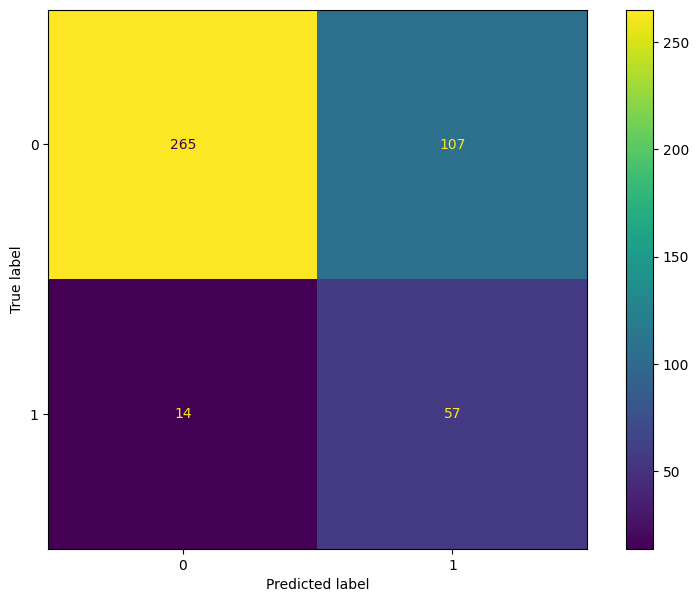

              precision    recall  f1-score   support

           0       0.95      0.71      0.81       372
           1       0.35      0.80      0.49        71

    accuracy                           0.73       443
   macro avg       0.65      0.76      0.65       443
weighted avg       0.85      0.73      0.76       443



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf_parameters = {
    'n_estimators': (2, 5, 10,20,30,40,50, 60, 70),
    'max_depth':(1,2,3,4,5, 6, 7, 8, 9, 10)
}

train(rf, rf_parameters, x_under, y_under, X_test, y_test)

- Score terbaik untuk  Hyperparameter pada Random Forest adalah max depth : 9 dan n_estimators : 50
- Setelah dilakukan Undersampling pada Model Random Forest Tree model dapat menangkap presentase yang lebih besar terhadap customer yang membeli membership dari yang sebelumnya 34% (Tuning) menjadi 56% (Smote dan Tuning) dan terakhir menjadi 80% (Undersampling dan Tuning)

### XGBoost Model

                                                          params  \
32  {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}    
31  {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}    
30  {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}     
22  {'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 100}   
21  {'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 50}    
4   {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}   
5   {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}   
13  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}    
33  {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 50}     
34  {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}    
14  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}    
35  {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}    
3   {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50}    
29  {'learning_rate': 0.2, 'max_depth': 3, 'n_es

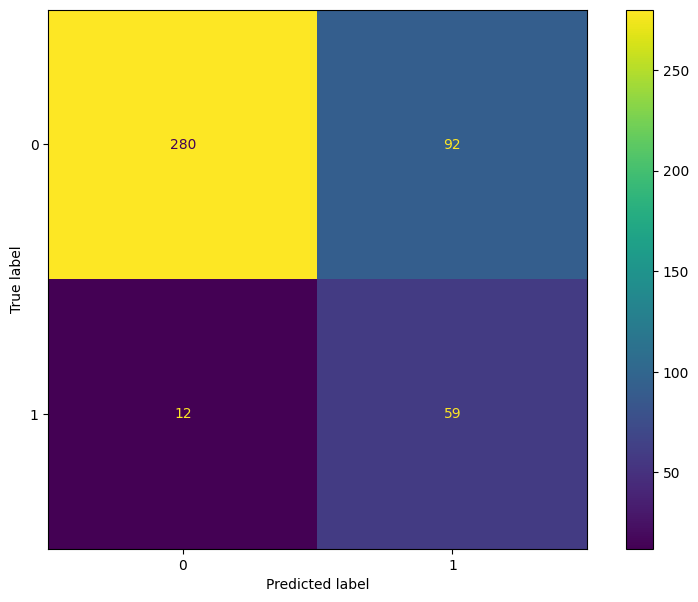

              precision    recall  f1-score   support

           0       0.96      0.75      0.84       372
           1       0.39      0.83      0.53        71

    accuracy                           0.77       443
   macro avg       0.67      0.79      0.69       443
weighted avg       0.87      0.77      0.79       443



In [ ]:
import xgboost as xgb

xg_boost = xgb.XGBClassifier(random_state=42)

xg_parameters = {
    'learning_rate': [0.05, 0.1, 0.15, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}
train(xg_boost, xg_parameters, x_under, y_under, X_test, y_test)

- Score terbaik untuk  Hyperparameter pada XGBoost adalah learning rate : 0,2 dan max_depth : 5, n_estimator : 200
-  Setelah dilakukan Undersampling pada Model XGBoost, performa model mengalami peningkatan dari yang sebelumnya 48% (Tuning) menjadi 51% (Smote dan Tuning) dan terakhir mengalami peningkatan menjadi 83% (Undersampling dan Tuning)

Observations :
- Dari 5 model diatas baik yang sudah dilakukan Hyperparameter Tuning,Smote dan Undersampling kita akan menggunakan model XGBoost yang sudah dilakukan Undersampling dan Hyperparamater Tuning karena memiliki recall sekitar 83%, lebih besar dibandingkan yang lainnya.
- Recall sangat penting dalam kasus ini karena kita sebagai pihak Superstore ingin memaksimalkan penjualan membership lewat telepon, dimana menargetkan customer yang memang diprediksi akan membeli membership dan sebenarnya membeli membership.

# Best Model

XGBoost with Hyperparameter Tuning and Undersampling

- Recal = 83 %
- Precision = 39 %
- F1 Score = 53 %


# Model Prediction

Model ini dapat menangkap 83 % customer yang sebenarnya membeli membership dari semua customer yang diprediksi membeli membership atau dengan kata dari Recall populasi yang benar-benar membeli membership, model mampu menangkap 83 % diantaranya yang benar membeli membership.

# Feature Importance

### Random Forest with Undersampling


In [ ]:
best_model = XGBClassifier(learning_rate = 0.2, max_depth = 5, n_estimators=200)
best_model.fit(x_under, y_under)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
importance = best_model.feature_importances_

feature_imp = pd.DataFrame(columns = ['X', '%'])
for i,v in enumerate(importance):
  feature_imp = feature_imp.append({'X':i, '%':v}, ignore_index=True)

feature_imp = feature_imp.sort_values('%', ascending=False).reset_index()
print(feature_imp)
     

    index     X         %
0   20     20.0  0.083074
1   26     26.0  0.076781
2   15     15.0  0.071337
3   8      8.0   0.062451
4   28     28.0  0.060527
5   9      9.0   0.055688
6   11     11.0  0.054327
7   19     19.0  0.054165
8   2      2.0   0.043854
9   6      6.0   0.042065
10  23     23.0  0.039992
11  25     25.0  0.037960
12  7      7.0   0.036661
13  0      0.0   0.036297
14  24     24.0  0.032949
15  4      4.0   0.028721
16  27     27.0  0.027856
17  21     21.0  0.027652
18  13     13.0  0.027536
19  12     12.0  0.026937
20  16     16.0  0.024914
21  5      5.0   0.017632
22  3      3.0   0.016038
23  1      1.0   0.014586
24  14     14.0  0.000000
25  17     17.0  0.000000
26  18     18.0  0.000000
27  22     22.0  0.000000
28  10     10.0  0.000000
29  29     29.0  0.000000


Text(0.5, 1.0, 'Feature Importace')

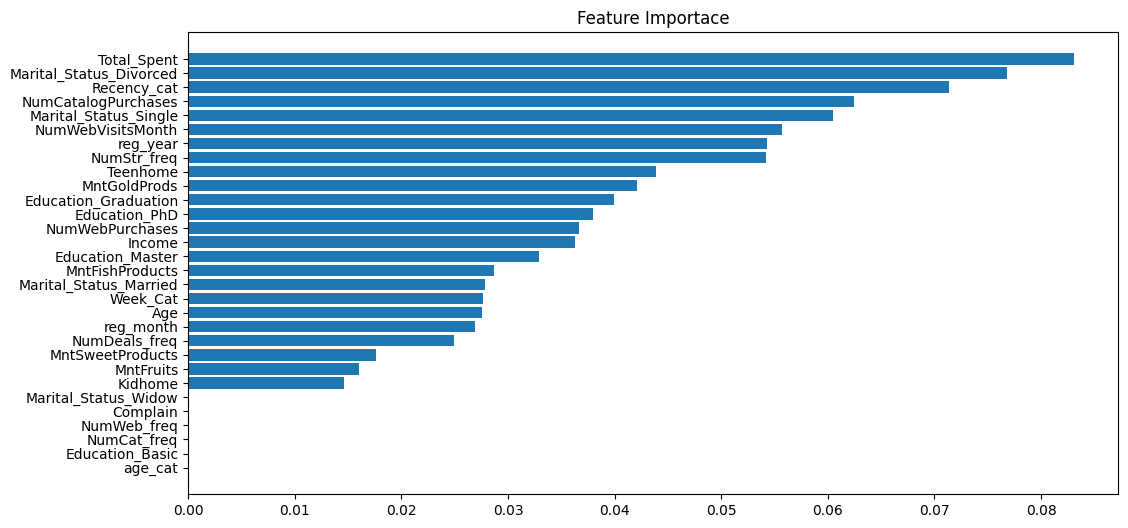

In [ ]:
feature_importance = best_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12,6))
plt.barh(range(len(sorted_idx)),feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)),np.array(X_train.columns)[sorted_idx])
plt.title('Feature Importace')

# Rekomendasi

Rekomendasi akan dibuat berdasarkan Feature Importance dari Model yang dipilih

Jenis Customer yang perlu dihubungi untuk campaign selanjutnya
- Pelanggan dengan total pembelanjaan diatas 1200 USD
- Pelanggan dengan jangka waktu pembelian di range 0 - 20 hari dari tanggal pembelian sebelumnya
- Pelanggan dengan status pernikahan single dan divorced
- Pelanggan yang melakukan pembelian lebih dari 10 kali lewat Katalog,Web,dan Store
- Pelanggan yang tidak memiliki anak kecil maupun anak dewasa
- Pelanggan yang melakukan pembelanjaan di week ke-3 

Rekomendasi tambahan 
- Pertahankan kualitas produk yang dijual,karena semakin banyak customer yang membeli produk,semakin banyak juga persentase customer untuk membeli membership
- Menambah jenis produk yang ada,khusunya untuk anak kecil hingga dewasa karena secara persentase banyak customer yang membeli membership itu tidak memiliki anak kecil dan dewasa. Sehingga segmen market untuk anak kecil dan dewasa masih terbuka luas.
- Tingkatkan performa web,design katalog dan pelayanan di toko karena terdapat banyak customer yang melakukan pembelian lewat marketing channel tersebut. 

# Dampak terhadap Bisnis

Kita asumsikan pihak superstore belum melakukan tindakan lebih lanjut terkait startegi penjualan membership

- Harga satuan gold membership : 449 USD
- error rate tanpa permodelan : 70%
- Total customer yang membeli membership : 443


Dengan adanya permodelan 

- Harga satuan gold membership : 449 USD
- error rate tanpa permodelan : 47%
- Total customer yang membeli membership : 443

Terdapat penurunan rate error 23% 
Total penjualan gold membership tanpa model 
30% X 443 X 449 = 59.672 USD

Total penjualan gold membership dengan model 
53% X 443 X 449 = 105.420 USD

Terjadi kenaikan revenue sebesar 45.748 USD





